# Comparison of Classifiers for Student Performance Predictions

## Om datasettet

Datasettet Predict Students' Dropout and Academic Succes er en del av et prosjekt på en portugisisk høyskole for å redusere frafall og mislykke i studier på et høyere utdanningsnivå. Informasjonen ble hentet fra flere ulike databaser relatert til bachelorgrad-studier, som f.eks. jordbruk, design, utdanningsvitenskap, sykepleie, journalistikk, ledelse, sosialt arbeid og teknologi. Den beskriver studenter, og blant annet deres studieprogram, demografi, sosioøkonomiske forhold, og studieprogresjon gjennom det første året.

Målet med datasettet er å kunne forutsi hvilke studenter som vil droppe ut, fortsette eller fullføre studiet ved hjelp av maskinlæring.

Datasettet inneholder 4424 observasjoner, altså antall studenter, med 36 features som er diverse informasjon om studentene, samt en målkolonne som forteller hvorvidt studenten dropper ut, fortsetter eller fullfører studiet. Variablene i datasettet er numeriske (heltall eller flyttall) eller kategoriske.

### Datasettet inneholder:
- **Marital status:** Heltall (Kategorisk), Sivilstatus til studenten
- **Application mode:** Heltall (Kategorisk), Opptaksordningen som gjaldt for studenten
- **Application order:** Heltall (Kategorisk), Hvilken prioritet studenten ga studiet ved søknad
- **Couse:** Heltall (Kategorisk), Studieprogrammet
- **Daytime/evening attendance:** Heltall (binær), Om det holdes forelesning på dagtid er kveld
- **Previous qualification:** Heltall (Kategorisk), Høyeste fullførte utdanning ved opptak
- **Previous qualification (grade):** Flyttall, Poengsum fra forrige utdanning
- **Nationality:** Heltall (Kategorisk), Nasjonaliteten til studenten
- **Mother's qualification:** Heltall (Kategorisk), Utdanningsnivå studentens mor
- **Father's qualification:** Heltall (Kategorisk), Utdanningsnivå til studentens far
- **Mothes's occupation:** Heltall (Kategorisk), Yrke til studentens mor
- **Father's occupation:** Heltall (Kategorisk), Yrke til studentens far
- **Admission grade:** Flyttall, Opptakskarakter
- **Displaced:** Heltall (binær), Om studenten har flyttet hjemmefra
- **Educational special needs:** Heltall (binær), Om studenten har spesielle læringsbehov
- **Debtor:** Heltall (binær), Om studenten har gjeld til universitet
- **Tuition fees up to date:** Heltall (binær), Om gjeld blir betalt i tide
- **Gender:** Heltall (binær), Kjønnet til studenten
- **Scholarhip holder:** Heltall (binær), Om studenten mottar stipend
- **Age at enrollment:** Heltall (binær), Alderen til studenten ved opptak
- **International:** Heltall (binær), Om studenten er internasjonal
- **Curricular units 1st sem (credited):** Heltall, Antall emner første semester som studenten har fått studiepoeng for
- **Curricular units 1st sem (enrolled):** Heltall, Antall emner første semester som studenten er påmeldt
- **Curricular units 1st sem (evaluations):** Heltall, Antall emner første semester som studenten har fått vurdering for
- **Curricular units 1st sem (approved):** Heltall, Antall emner første semester som studenten har bestått
- **Curricular units 1st sem (grade):** Flyttall, Gjennomsnittskarakter første semester
- **Curricular units 1st sem (without evaluations):** Heltall, Antall emner første semester uten vurdering
- **Curricular units 2nd sem (credited):** Heltall, Antall emner andre semester som studenten har fått studiepoeng for
- **Curricular units 2nd sem (enrolled):** Heltall, Antall emner andre semester som studenten er påmeldt
- **Curricular units 2nd sem (evaluations):** Heltall, Antall emner andre semester som studenten har fått vurdering for
- **Curricular units 2nd sem (approved):** Heltall, Antall emner andre semester som studenten har bestått
- **Curricular units 2nd sem (grade):** Flyttall, Gjennomsnittskarakter andre semester
- **Curricular units 2nd sem (without evaluations):** Heltall, Antall emner andre semester uten vurdering
- **Unemployment rate:** Flyttall, Arbeidsledigheten i regionen til skolen
- **Inflation rate:** Flyttall, Inflasjonsraten i regionen til skolen
- **GDP:** Flyttall, Bruttonasjonalprodukt i regionen til skolen
- **Target:** Kategorisk, Utfallet for studenten

Klarte ikke å finne en god kilde på hvor arbeidsledigheten, inflasjonsraten og bruttonasjonalprodukt gjaldt, men jeg antar at det gjelder regionen der skolen befinner seg, og ikke hvor studenten er fra. Dette er fordi nasjonaliteten til en student ikke nødvendigvis samsvarer med disse verdiene, f.eks. student nr 1 og 2 er fra Portugal, men har ulike verdier for disse.

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, get_scorer
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, classification_report, roc_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate, train_test_split
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier

## Preprossessering

In [2]:
dataset = pd.read_csv("data.csv", delimiter=";")
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Manglende verdier og duplikater

In [4]:
missing_values = int(dataset.isna().sum().sum())
duplicate_values = int(dataset.isna().sum().sum())
print(f"Antall manglende verdier i datasettet: {missing_values}")
print(f"Antall duplikat-rader: {duplicate_values}")

Antall manglende verdier i datasettet: 0
Antall duplikat-rader: 0


Jeg sjekket at dataen var som forventet for datasettet. Det stemte overens med hva jeg forventet, altså antall rader og kolonner er korrekt, det er ingen manglende verdier slik som dokumentasjonen beskrev, og heller ingen duplikat-rader.

### Klassefordeling

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>],
       [<Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>],
     

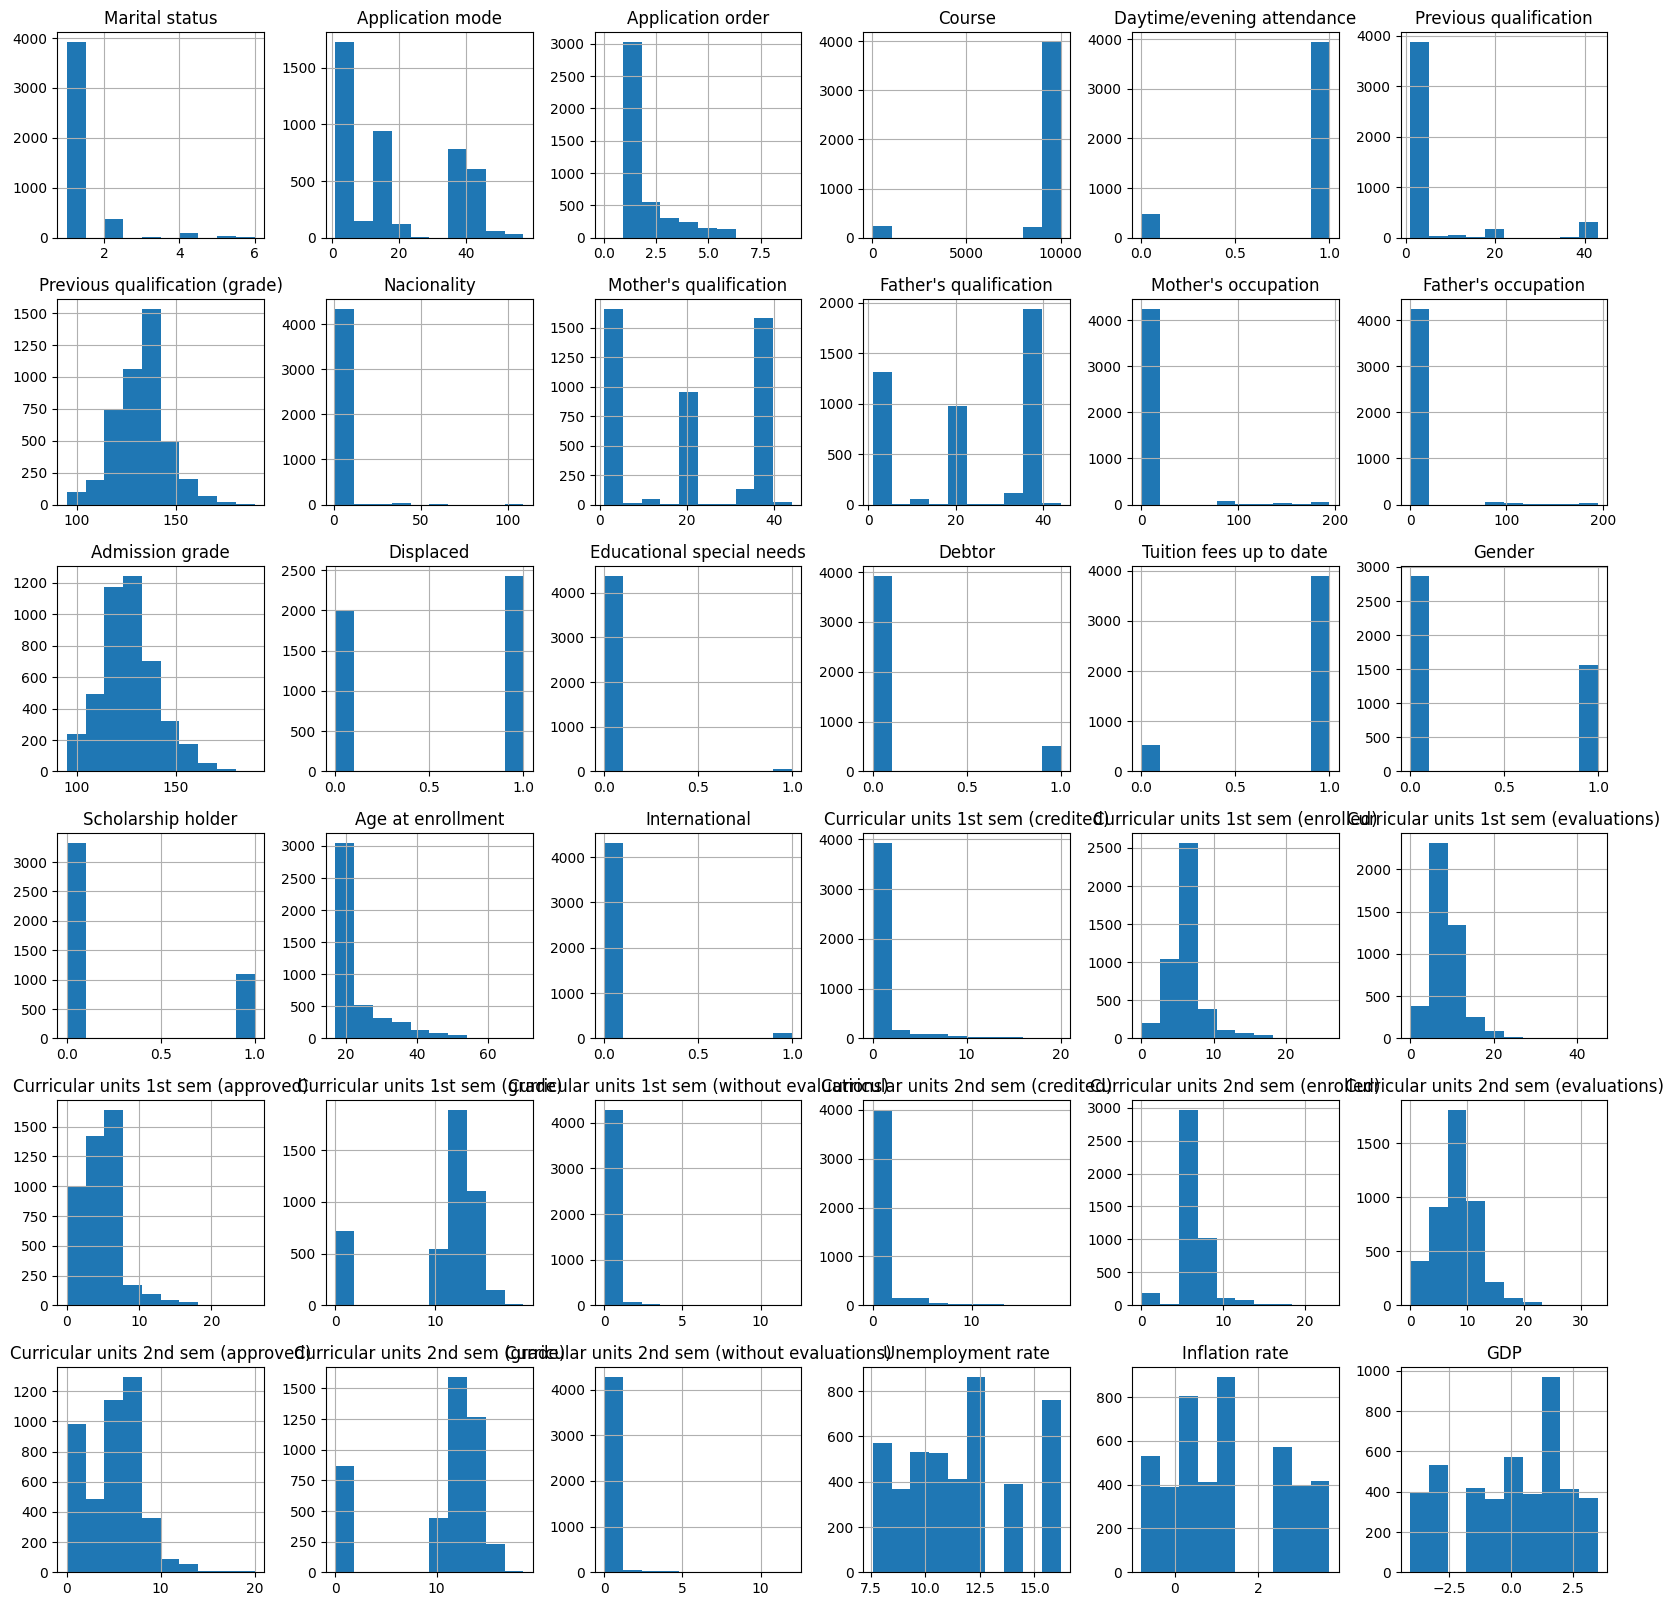

In [5]:
dataset_features = dataset.drop("Target", axis=1)
dataset_targets = dataset["Target"]

encoder = LabelEncoder()
targets_encoded = pd.Series(encoder.fit_transform(dataset_targets))
dataset_features.hist(figsize=(20,20))

Standardisering av dataen skal sørge for at alle numeriske, ikke binære variabler måles på samme skala, slik at ikke features med høyere tallverdier skal dominere i algoritmene. Dette er spesielt viktig for SVC ettersom denne er avstandsbasert.

Flere features er skjevt fordelt så jeg vil teste om log-transformasjon på disse vil forbedre metrikkene. Dette gjelder ikke de kategoriske eller binære variablene. De jeg skal forsøke log-transformasjon på er alle Curricular units 1st/2nd sem, ettersom disse er høyreskjeve.

Ettersom flere variabler er kategoriske, altså at størrelsen på tallverdien ikke gir noen meningsfull informasjon, så vil jeg forsøke OneHotEncoder på disse.

<Axes: xlabel='Target'>

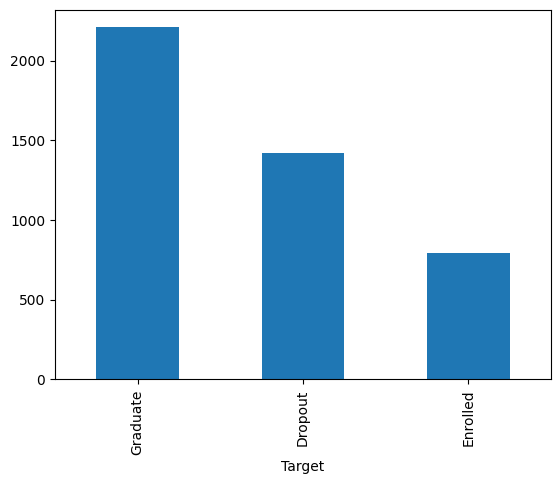

In [6]:
dataset["Target"].value_counts().plot.bar()

Datasettet er tydelig ubalansert. Antall studenter som fullfører er fler enn de som dropper ut, og klart fler enn de som fremdeles ikke er ferdige med studiet.

In [7]:
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
encoder.classes_

array(['Dropout', 'Enrolled', 'Graduate'], dtype=object)

- Klasse 0 = Dropout
- Klasse 1 = Enrolled
- Klasse 2 = Graduate

### Korrelasjon

In [9]:
non_categorical_features = dataset_features.drop(columns=["Marital status", "Application mode", "Course", "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"])
non_categorical_features_correlation = non_categorical_features.corr()
non_categorical_features_correlation.style.background_gradient(cmap="coolwarm") 

,Application order,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Application order,1.000000,0.158657,-0.064484,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Daytime/evening attendance,0.158657,1.000000,0.052597,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification (grade),-0.064484,0.052597,1.000000,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Admission grade,-0.096930,0.007970,0.580444,1.000000,-0.000543,-0.018306,-0.014423,0.054132,0.008315,0.018881,-0.029915,0.025274,0.040829,-0.033251,-0.072059,0.070892,0.073868,0.009033,0.040225,-0.041878,-0.057132,0.076659,0.074402,-0.013254,0.038756,-0.021624,-0.019519
Displaced,0.332362,0.251767,-0.011001,-0.000543,1.000000,0.004395,-0.089901,0.096027,-0.125815,0.072887,-0.362032,-0.009687,-0.097268,-0.063812,-0.077665,0.047682,0.064815,-0.021671,-0.091738,-0.041823,-0.038839,0.063698,0.069087,-0.035959,-0.130327,-0.012385,0.062875
Educational special needs,0.025597,0.031017,-0.001458,-0.018306,0.004395,1.000000,0.001343,0.013630,-0.017461,0.021223,-0.036987,-0.003646,-0.024411,-0.034837,-0.025972,-0.019873,-0.012284,-0.012324,-0.021671,-0.028777,-0.010851,-0.016315,-0.012761,-0.007491,0.046131,0.004396,0.012016
Debtor,-0.072151,0.006658,-0.037507,-0.014423,-0.089901,0.001343,1.000000,-0.408454,0.053812,-0.067489,0.098793,0.075423,0.034053,-0.010652,0.036054,-0.106657,-0.104170,0.001812,0.025414,-0.029436,0.024201,-0.146977,-0.139424,0.048552,0.021128,-0.021888,0.075050
Tuition fees up to date,0.055891,0.038799,0.060578,0.054132,0.096027,0.013630,-0.408454,1.000000,-0.104098,0.137421,-0.178099,-0.044202,0.003803,0.058721,0.027514,0.239347,0.250394,-0.049775,0.014204,0.085918,0.063482,0.291921,0.296480,-0.071817,0.013460,-0.000706,-0.002768
Gender,-0.089559,-0.012326,-0.047874,0.008315,-0.125815,-0.017461,0.053812,-0.104098,1.000000,-0.169302,0.148835,-0.026415,0.017099,-0.095253,-0.021334,-0.183829,-0.189448,-0.006302,0.018737,-0.124227,-0.041789,-0.224266,-0.199133,0.057223,0.022195,0.003556,-0.008108
Scholarship holder,0.073709,0.093912,0.055965,0.018881,0.072887,0.021223,-0.067489,0.137421,-0.169302,1.000000,-0.189917,-0.027972,-0.088718,-0.004927,-0.063429,0.153772,0.168324,-0.057770,-0.076480,0.026416,-0.021410,0.202704,0.181227,-0.048723,0.055152,-0.031104,0.035650


For å sjekke korrelasjonen måtte jeg utelukke features som representerer kategorier, med unntak av når de er binære verdier. Dette er fordi korrelasjonen er den lineære sammenhengen, og vil derfor ikke gi noen meningsfull informasjon for verdiene som representerer en kategori.

Noen features viser seg å på det meste ha en moderat negativ korrelasjon. De høyeste negative korrelasjonene er; "Age at enrollment" og "Daytime/evening attendance" med korrelasjon på ca. -0.462, og "Tuition fees up to date" og "Debtor" med korrelasjon på ca. -0.408. Om studiet er på dagen så vil verdien være 1, og om det er på kvelden vil det være 0, verdien for alder er kontinuerlig stigende. Det viser altså at jo eldre studenten er, jo mer sannsynlig er det at studenten tar kveldsstudie. Dette virker rimelig ettersom det kan tenkes at eldre studenter ofte er i jobb på dagen, og må derfor gå på skolen på kvelden. Om studenten har gjeld, og om den betaler skoleavgift til tiden, vil verdiene være 1, og hvis ikke vil de være 0. En moderat negativ korrelasjon her tyder på at om studenten har gjeld, så er det mindre sannsynlig at den betaler skoleavgift til tide enn om ikke, noe som virker rimelig.

Mange fler features viser seg å ha høy positiv korrelasjon, og enkelte av dem er svært sterkt korrelert. De høyeste positive korrelasjonene er "Curricular units 1st sem (credited)" og "Curricular units 2nd sem (credited)" med korrelasjon på ca. 0.945, "Curricular units 1st sem (enrolled)" og "Curricular units 2nd sem (enrolled)" med korrelasjon på ca. 0.943, samt "Curricular units 1st sem (approved)" og "Curricular units 2nd sem (approved)" med korrelasjon på ca. 0.904. Dette viser at antall emner studenten er påmeldt, har bestått og fått poeng for første semester, veldig ofte stemmer overens med antall emner dette gjelder i andre semester.

### Funksjon for bygging av tensorflow modell

In [189]:
def build_tensorflow_model(meta, hidden_layers=(64,32), dropout_rate=0.0):
    n_features = meta["n_features_in_"]
    n_classes = meta["n_classes_"]

    model = Sequential()
    model.add(tf.keras.Input(shape=(n_features,)))

    for units in hidden_layers:
        model.add(Dense(units, activation="relu"))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(n_classes, activation="softmax"))
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

Her laget jeg en funksjon som skal bygge et nevralt nettverk med Tensorflow som vil bli brukt i KerasClassifier. Meta sørger for at funksjonen automatisk oppdager antall klasser og features. For tensorflow modellen er det viktig at antall features blir definert som en input, og dette vil variere ettersom noen features vil bli encodet. Funksjonen tar imot antall nevroner i første og andre skjulte lag, samt en dropout rate som skal tunes senere. Den kompilerer modellen, og er definert til å evalueres på accuracy under trening ettersom det er vanlig i Keras. Den vil likevel bli tunet for precision senere slik som de andre modellene.

In [64]:
categorical_features = [
    "Marital status", 
    "Application mode", 
    "Course", 
    "Previous qualification", 
    "Nacionality", 
    "Mother's qualification", 
    "Father's qualification", 
    "Mother's occupation", 
    "Father's occupation"
    ]

binary = [
    "Daytime/evening attendance",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International"
]

continious = [
    "Application order",
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

continious_nb = [
    "Application order",
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
]

features_to_log = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

Jeg lagde lister for å dele opp dataen basert på hvordan den skal prosesseres. Jeg lagde en liste for kategoriske variabler, som jeg skal forsøke encoding på, en liste for binære variabler som ikke behøver noen prosessering, en liste over kontinuerlige variabler som skal forsøkes skalering på, og en liste for variabler som skal log-transformeres.

In [190]:
scale = ColumnTransformer(
    transformers=[
        ("con", StandardScaler(), continious)
    ],
    remainder="passthrough"
)

encode = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ],
    remainder="passthrough"
)

log = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p, feature_names_out='one-to-one'), features_to_log),
    ],
    remainder='passthrough'
)
scale_and_encode = ColumnTransformer(
    transformers=[
        ("con", StandardScaler(), continious),
        ("bin", "passthrough", binary),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ]
)

log_and_scale_pipe = Pipeline([
        ("log", log),
        ("scale", StandardScaler())
])
log_and_scale = ColumnTransformer(
    transformers=[
        ("con", log_and_scale_pipe, continious)
    ],
    remainder="passthrough"
)

log_and_encode = ColumnTransformer(
    transformers=[
        ("con", log, continious),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ],
    remainder="passthrough"
)

log_and_encode_nb = ColumnTransformer(
    transformers=[
        ("con", log, continious_nb),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ],
    remainder="passthrough"
)

log_scale_encode = ColumnTransformer(
    transformers=[
        ("con", log_and_scale_pipe, continious),
        ("bin", "passthrough", binary),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ]
)


Jeg valgte å bruke columntransformers for å kunne teste ulike kombinasjoner av preprossessert data i pipelines i riktig rekkefølge. Jeg tester skalering av kolonner som ikke er binære verdier, log-transformasjon på de som er svært skjeve, og OneHotEncoder på kategoriske features. Jeg får derfor testet følgende kombinasjoner.

- **Kun skalering**
- **Kun encoding**
- **Kun log**
- **Skalering og encoding**
- **Log og skalering**
- **Log og encoding**
- **Log, skalering og encoding**

In [16]:
encoded = encode.fit_transform(dataset_features)
encoded.shape

(4424, 247)

Encoding av dataen vil utvide antall features til 247.

### Metrikker som skal testes

In [17]:
scoring = {
    'accuracy': get_scorer('accuracy'),
    'precision': make_scorer(precision_score, average='macro', zero_division=1.0),
    'recall': make_scorer(recall_score, average='macro', zero_division=1.0),
    'f1': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', average='macro', response_method='predict_proba'),
}

In [18]:
tensorflow_scoring = {
    'accuracy': get_scorer('accuracy'),
    'precision': make_scorer(precision_score, average='macro', zero_division=1.0),
    'recall': make_scorer(recall_score, average='macro', zero_division=1.0),
    'f1': make_scorer(f1_score, average='macro')
}

Tensorflow ville ikke fungere da jeg forsøkte å måle ROC_AUC, så jeg valgte å fjerne denne for disse modellene.

### Pipelines for skalering, encoding og log

In [150]:
global_random_state = 13
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)

pipelines = {
    "gb_no_processing": Pipeline([
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_scaled": Pipeline([
        ('scale', scale),       
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_encoded": Pipeline([
        ('enc', encode),       
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_log": Pipeline([
        ('log', log),       
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_scaled_encoded": Pipeline([
        ('scale_encode', scale_and_encode),     
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_log_scaled": Pipeline([
        ('log_scaled', log_and_scale),     
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_log_encoded": Pipeline([
        ('log_encoded', log_and_encode),     
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_log_scaled_encoded": Pipeline([
        ('log_scaled_encoded', log_scale_encode),     
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),

    "mnb_no_processing": Pipeline([
        ('nb', MultinomialNB())
    ]),
    "mnb_encoded": Pipeline([
        ('enc', encode),       
        ('nb', MultinomialNB())
    ]),
    "mnb_log": Pipeline([
        ('log', log),       
        ('nb', MultinomialNB())
    ]),
    "mnb_log_encoded": Pipeline([
        ('log_encoded', log_and_encode_nb),     
        ('nb', MultinomialNB())
    ]),

    "cnb_no_processing": Pipeline([
        ('nb', ComplementNB())
    ]),
    "cnb_encoded": Pipeline([
        ('enc', encode),       
        ('nb', ComplementNB())
    ]),
    "cnb_log": Pipeline([
        ('log', log),       
        ('nb', ComplementNB())
    ]),
    "cnb_log_encoded": Pipeline([
        ('log_encoded', log_and_encode_nb),     
        ('nb', ComplementNB())
    ]),

    "svc_no_processing": Pipeline([
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_scaled": Pipeline([
        ('scale', scale),       
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_encoded": Pipeline([
        ('enc', encode),       
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_log": Pipeline([
        ('log', log),       
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_scaled_encoded": Pipeline([
        ('scale_encode', scale_and_encode),     
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_log_scaled": Pipeline([
        ('log_scaled', log_and_scale),     
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_log_encoded": Pipeline([
        ('log_encoded', log_and_encode),     
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_log_scaled_encoded": Pipeline([
        ('log_scaled_encoded', log_scale_encode),     
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    
    "mlp_no_processing": Pipeline([
        ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_scaled": Pipeline([
        ('scale', scale),       
        ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_encoded": Pipeline([
        ('enc', encode),       
        ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_log": Pipeline([
        ('log', log),       
        ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_scaled_encoded": Pipeline([
        ('scale_encode', scale_and_encode),     
        ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_log_scaled": Pipeline([
        ('log_scaled', log_and_scale),     
        ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_log_encoded": Pipeline([
        ('log_encoded', log_and_encode),     
        ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_log_scaled_encoded": Pipeline([
        ('log_scaled_encoded', log_scale_encode),     
        ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=global_random_state))
    ]),

    "tf_no_processing": Pipeline([
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_scaled": Pipeline([
        ('scale', scale),       
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_encoded": Pipeline([
        ('enc', encode),       
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_log": Pipeline([
        ('log', log),       
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_scaled_encoded": Pipeline([
        ('scale_encode', scale_and_encode),     
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_log_scaled": Pipeline([
        ('log_scaled', log_and_scale),     
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_log_encoded": Pipeline([
        ('log_encoded', log_and_encode),     
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_log_scaled_encoded": Pipeline([
        ('log_scaled_encoded', log_scale_encode),     
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
     
}

In [63]:
neg_cols = (dataset_features < 0).any()
print(neg_cols[neg_cols].index.tolist())
nb_features = dataset_features.drop(columns=["Inflation rate", "GDP"])

['Inflation rate', 'GDP']


Jeg valgte å lage pipelines for å sørge for at dataen blir skalert, log-transformert og encodet for hver fold i kryssvalideringen. Dette gjør jeg for å sørge for at det ikke blir noen datalekasje.

Jeg ønsket å teste Multinominal og Complement Naive Bayes ettersom disse vil være mest egnet for dette datasettet. Andre Naive Bayes modeller vil være for sensitive for features som ikke er normalfordelt eller kontinuerlige, men disse vil begge to håndtere det bedre, samt egne seg for encodet data. Multinominal er ofte god for dette generelt, men Complement vil ofte kunne håndtere ubalanserte klasser enda bedre. Begge disse modellene tar kun imot positive verdier, noe som gjør at StandardScaler ikke kan brukes på disse, men det går fint ettersom det generelt ikke vil være lønnsomt for Naive Bayes uansett. Jeg må også fjerne Inflation rate og GDP for disse modellene ettersom de inneholder negative verdier.

Bruker probability=True på SVC for å kunne måle ROC-AUC. Når jeg gjør dette så gjør modellen en intern logistisk regresjon som er random, og jeg må derfor sette random state.

Jeg valgte å sette max_iter til 1000 for MLP ettersom jeg fikk meldinger om at den stoppet tidlig ved en lavere verdi, noe som kan føre til suboptimale resultater. Max_iter er omtrent det samme som epochs, selvom epochs bruker vesentlig lenger tid på å kjøre ettersom tensorflow-modellen gjør en mye tyngre jobb per steg. Jeg bruker to lag med 64 og 32 nevroner for å være konsistent ved de nevrale nettverkene.

For tensorflow-modellene så brukte jeg funksjonen jeg lagde for å bygge disse. Jeg satt antall epochs til 15 for å kunne få gode resultater uten at de må kjøre alt for lenge i disse testene. Batch_size satt jeg til 32 ettersom det er en verdi som ofte er brukt. Verbose satt jeg til 0 for å slippe å få skrevet ut alt for mye informasjon.

### AB-tester for Gradient Boosting

In [51]:
print("Gradient boosting:")
for name, pipe in pipelines.items():
    if not name.startswith(("gb")):
        continue
    cv_results = cross_validate(pipe, dataset_features, targets_encoded, cv=cv, scoring=scoring)
    print(name,":")
    print(f"Accuracy:  {cv_results["test_accuracy"]} Gjennomsnitt: {np.mean(cv_results["test_accuracy"]):.3f}")
    print(f"Precision: {cv_results["test_precision"]} Gjennomsnitt: {np.mean(cv_results["test_precision"]):.3f}")
    print(f"Recall:    {cv_results["test_recall"]} Gjennomsnitt: {np.mean(cv_results["test_recall"]):.3f}")
    print(f"F1:        {cv_results["test_f1"]} Gjennomsnitt: {np.mean(cv_results["test_f1"]):.3f}")
    print(f"ROC:       {cv_results["test_roc_auc"]} Gjennomsnitt: {np.mean(cv_results["test_roc_auc"]):.3f}")

Gradient boosting:
gb_no_processing :
Accuracy:  [0.78305085 0.77062147 0.77062147 0.76610169 0.78054299] Gjennomsnitt: 0.774
Precision: [0.73224682 0.71657852 0.71893026 0.71346154 0.74060923] Gjennomsnitt: 0.724
Recall:    [0.69518225 0.68297394 0.68909861 0.67408503 0.70868416] Gjennomsnitt: 0.690
F1:        [0.70278354 0.6930265  0.69807166 0.68383119 0.72028769] Gjennomsnitt: 0.700
ROC:       [0.90374504 0.8896223  0.89188639 0.88697228 0.89599781] Gjennomsnitt: 0.894
gb_scaled :
Accuracy:  [0.78305085 0.76949153 0.77175141 0.76497175 0.78054299] Gjennomsnitt: 0.774
Precision: [0.73224682 0.71489551 0.72076273 0.71151173 0.74060923] Gjennomsnitt: 0.724
Recall:    [0.69518225 0.68221979 0.69119504 0.67333088 0.70868416] Gjennomsnitt: 0.690
F1:        [0.70278354 0.6920908  0.70025734 0.68288935 0.72028769] Gjennomsnitt: 0.700
ROC:       [0.90366588 0.8894084  0.89181458 0.88615837 0.89590179] Gjennomsnitt: 0.893
gb_encoded :
Accuracy:  [0.77627119 0.7819209  0.77740113 0.75706215 0

For gradient boosting så påvirker ikke skalering dataen omtrent noe. Log og encoding påvirker også metrikkene minimalt. Prosesseringen som såvidt gir best ROC-AUC er ingen prosessering. Dette gir mening ettersom Gradient Boosting ofte fungerer godt på lite prosessert data.

### AB-tester for Multinominal Naive Bayes

In [67]:
print("Multinominal Naive Bayes:")
for name, pipe in pipelines.items():
    if not name.startswith(("mnb")):
        continue
    cv_results = cross_validate(pipe, nb_features, targets_encoded, cv=cv, scoring=scoring)
    print(name,":")
    print(f"Accuracy:  {cv_results["test_accuracy"]} Gjennomsnitt: {np.mean(cv_results["test_accuracy"]):.3f}")
    print(f"Precision: {cv_results["test_precision"]} Gjennomsnitt: {np.mean(cv_results["test_precision"]):.3f}")
    print(f"Recall:    {cv_results["test_recall"]} Gjennomsnitt: {np.mean(cv_results["test_recall"]):.3f}")
    print(f"F1:        {cv_results["test_f1"]} Gjennomsnitt: {np.mean(cv_results["test_f1"]):.3f}")
    print(f"ROC:       {cv_results["test_roc_auc"]} Gjennomsnitt: {np.mean(cv_results["test_roc_auc"]):.3f}")

Multinominal Naive Bayes:
mnb_no_processing :
Accuracy:  [0.61468927 0.62259887 0.63276836 0.59774011 0.60520362] Gjennomsnitt: 0.615
Precision: [0.52685695 0.50691259 0.53143337 0.47774494 0.5068196 ] Gjennomsnitt: 0.510
Recall:    [0.52484971 0.51144312 0.52729051 0.48973353 0.51081326] Gjennomsnitt: 0.513
F1:        [0.52296342 0.4921919  0.51783531 0.47367222 0.50311891] Gjennomsnitt: 0.502
ROC:       [0.74296425 0.73518121 0.75694193 0.71923236 0.73338927] Gjennomsnitt: 0.738
mnb_encoded :
Accuracy:  [0.71073446 0.68361582 0.70508475 0.69830508 0.68665158] Gjennomsnitt: 0.697
Precision: [0.66965018 0.63473422 0.67165759 0.64338025 0.64361409] Gjennomsnitt: 0.653
Recall:    [0.64808307 0.6165954  0.65130935 0.62354754 0.62533765] Gjennomsnitt: 0.633
F1:        [0.65408115 0.6212993  0.65237127 0.62953247 0.62894103] Gjennomsnitt: 0.637
ROC:       [0.83235797 0.79658308 0.8144535  0.81897203 0.81537363] Gjennomsnitt: 0.816
mnb_log :
Accuracy:  [0.52542373 0.55254237 0.56045198 0.511

Multinominal Naive Bayes gir dårligere metrikker enn Gradient Boosting. Denne fungerer klart best på kun encodet data

### AB-tester for Complement Naive Bayes

In [68]:
print("Complement Naive Bayes:")
for name, pipe in pipelines.items():
    if not name.startswith(("cnb")):
        continue
    cv_results = cross_validate(pipe, nb_features, targets_encoded, cv=cv, scoring=scoring)
    print(name,":")
    print(f"Accuracy:  {cv_results["test_accuracy"]} Gjennomsnitt: {np.mean(cv_results["test_accuracy"]):.3f}")
    print(f"Precision: {cv_results["test_precision"]} Gjennomsnitt: {np.mean(cv_results["test_precision"]):.3f}")
    print(f"Recall:    {cv_results["test_recall"]} Gjennomsnitt: {np.mean(cv_results["test_recall"]):.3f}")
    print(f"F1:        {cv_results["test_f1"]} Gjennomsnitt: {np.mean(cv_results["test_f1"]):.3f}")
    print(f"ROC:       {cv_results["test_roc_auc"]} Gjennomsnitt: {np.mean(cv_results["test_roc_auc"]):.3f}")

Complement Naive Bayes:
cnb_no_processing :
Accuracy:  [0.62824859 0.62485876 0.62711864 0.59887006 0.61538462] Gjennomsnitt: 0.619
Precision: [0.52594496 0.48887135 0.51173067 0.44297486 0.5011871 ] Gjennomsnitt: 0.494
Recall:    [0.52084479 0.50993242 0.51563479 0.48142762 0.50730464] Gjennomsnitt: 0.507
F1:        [0.49973277 0.47861277 0.49332197 0.45100421 0.4819264 ] Gjennomsnitt: 0.481
ROC:       [0.74962761 0.74109451 0.76108528 0.72168625 0.73987825] Gjennomsnitt: 0.743
cnb_encoded :
Accuracy:  [0.70960452 0.69717514 0.69717514 0.68926554 0.67420814] Gjennomsnitt: 0.693
Precision: [0.72346731 0.67498969 0.69142426 0.60904534 0.61916537] Gjennomsnitt: 0.664
Recall:    [0.57445531 0.56474211 0.56717434 0.55459709 0.54539058] Gjennomsnitt: 0.561
F1:        [0.54472627 0.5385215  0.54986948 0.52346689 0.51444484] Gjennomsnitt: 0.534
ROC:       [0.82835169 0.80108658 0.80925378 0.82647505 0.81225626] Gjennomsnitt: 0.815
cnb_log :
Accuracy:  [0.5299435  0.55367232 0.56045198 0.51412

Complement Naive Bayes fungerer også dårligere enn Gradient Boosting, og omtrent like godt som Multinominal. Denne fungerer også best på kun encodet data.

### AB-tester for SVC

In [71]:
print("SVC:")
for name, pipe in pipelines.items():
    if not name.startswith(("svc")):
        continue
    cv_results = cross_validate(pipe, dataset_features, targets_encoded, cv=cv, scoring=scoring)
    print(name,":")
    print(f"Accuracy:  {cv_results["test_accuracy"]} Gjennomsnitt: {np.mean(cv_results["test_accuracy"]):.3f}")
    print(f"Precision: {cv_results["test_precision"]} Gjennomsnitt: {np.mean(cv_results["test_precision"]):.3f}")
    print(f"Recall:    {cv_results["test_recall"]} Gjennomsnitt: {np.mean(cv_results["test_recall"]):.3f}")
    print(f"F1:        {cv_results["test_f1"]} Gjennomsnitt: {np.mean(cv_results["test_f1"]):.3f}")
    print(f"ROC:       {cv_results["test_roc_auc"]} Gjennomsnitt: {np.mean(cv_results["test_roc_auc"]):.3f}")

SVC:
svc_no_processing :
Accuracy:  [0.49830508 0.49943503 0.49943503 0.49943503 0.5       ] Gjennomsnitt: 0.499
Precision: [0.83276836 0.83314501 0.83314501 0.83314501 0.83333333] Gjennomsnitt: 0.833
Recall:    [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333] Gjennomsnitt: 0.333
F1:        [0.22171946 0.22205476 0.22205476 0.22205476 0.22222222] Gjennomsnitt: 0.222
ROC:       [0.76138507 0.74869129 0.70885393 0.72590935 0.71753152] Gjennomsnitt: 0.732
svc_scaled :
Accuracy:  [0.49830508 0.49943503 0.49943503 0.49943503 0.5       ] Gjennomsnitt: 0.499
Precision: [0.83276836 0.83314501 0.83314501 0.83314501 0.83333333] Gjennomsnitt: 0.833
Recall:    [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333] Gjennomsnitt: 0.333
F1:        [0.22171946 0.22205476 0.22205476 0.22205476 0.22222222] Gjennomsnitt: 0.222
ROC:       [0.65386294 0.61578689 0.55472946 0.61501774 0.57070677] Gjennomsnitt: 0.602
svc_encoded :
Accuracy:  [0.66779661 0.66214689 0.64745763 0.66553672 0.66063348] 

SVC gir litt lavere ROC-AUC enn Gradient Boosting, men generelt nesten like gode metrikker. På noen modeller får den svært høy precision, men kun på der de andre metrikkene blir svært lave. Dette er sannsynligvis fordi modellen svært sjelden predikerer en positiv klasse, men at den treffer når den først gjør det.

Skalering og log i seg minker ROC-AUC. Encoding øker den vesentlig. Skalert og encodet data sammen gir best ROC-AUC og generelt gode metrikker.

### AB-tester for MLP

In [151]:
print("MLP:")
for name, pipe in pipelines.items():
    if not name.startswith(("mlp")):
        continue
    cv_results = cross_validate(pipe, dataset_features, targets_encoded, cv=cv, scoring=scoring)
    print(name,":")
    print(f"Accuracy:  {cv_results["test_accuracy"]} Gjennomsnitt: {np.mean(cv_results["test_accuracy"]):.3f}")
    print(f"Precision: {cv_results["test_precision"]} Gjennomsnitt: {np.mean(cv_results["test_precision"]):.3f}")
    print(f"Recall:    {cv_results["test_recall"]} Gjennomsnitt: {np.mean(cv_results["test_recall"]):.3f}")
    print(f"F1:        {cv_results["test_f1"]} Gjennomsnitt: {np.mean(cv_results["test_f1"]):.3f}")
    print(f"ROC:       {cv_results["test_roc_auc"]} Gjennomsnitt: {np.mean(cv_results["test_roc_auc"]):.3f}")

MLP:
mlp_no_processing :
Accuracy:  [0.56158192 0.39435028 0.59548023 0.50056497 0.65045249] Gjennomsnitt: 0.540
Precision: [0.39114994 0.60589632 0.51193531 0.35907187 0.52002977] Gjennomsnitt: 0.478
Recall:    [0.47495723 0.42762867 0.44551668 0.3384503  0.51596584] Gjennomsnitt: 0.441
F1:        [0.41239035 0.32468821 0.41063203 0.24005367 0.4742461 ] Gjennomsnitt: 0.372
ROC:       [0.70227288 0.68446245 0.70618347 0.7520908  0.73914973] Gjennomsnitt: 0.717
mlp_scaled :
Accuracy:  [0.67457627 0.68248588 0.50960452 0.19096045 0.38348416] Gjennomsnitt: 0.488
Precision: [0.44481931 0.53258862 0.44773576 0.34718407 0.52866332] Gjennomsnitt: 0.460
Recall:    [0.54185464 0.54789233 0.35690003 0.32929892 0.38113762] Gjennomsnitt: 0.431
F1:        [0.48855255 0.49692456 0.27853835 0.14071212 0.27888861] Gjennomsnitt: 0.337
ROC:       [0.76476477 0.79219113 0.74890588 0.68700066 0.7251305 ] Gjennomsnitt: 0.744
mlp_encoded :
Accuracy:  [0.79096045 0.77175141 0.74576271 0.75028249 0.76244344] 

MLP Gir litt lavere ROC-AUC enn Gradient Boosting og SVC, men nesten like god. Denne fungerer best på kun encodet data. Som regel er skalert data viktig for nevrale nettverk, men for dette datasettet ser det ut til at det gjør metrikkene dårligere dersom de kategoriske variablene blir encodet. Dette er trolig fordi datasettet er dominert av binære encodet variabler, og de vil ikke gi like god informasjon dersom de kontinuerlige variablene blir skalert. 

### AB-tester for Keras/Tensorflow

In [191]:
print("Keras/Tensorflow:")
for name, pipe in pipelines.items():
    if not name.startswith("tf"):
        continue
    cv_results = cross_validate(pipe, dataset_features, targets_encoded, cv=cv, scoring=tensorflow_scoring)
    print(name,":")
    print(f"Accuracy:  {cv_results["test_accuracy"]} Gjennomsnitt: {np.mean(cv_results["test_accuracy"]):.3f}")
    print(f"Precision: {cv_results["test_precision"]} Gjennomsnitt: {np.mean(cv_results["test_precision"]):.3f}")
    print(f"Recall:    {cv_results["test_recall"]} Gjennomsnitt: {np.mean(cv_results["test_recall"]):.3f}")
    print(f"F1:        {cv_results["test_f1"]} Gjennomsnitt: {np.mean(cv_results["test_f1"]):.3f}")

Keras/Tensorflow:


2025-12-08 13:22:39.818182: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-12-08 13:22:44.886903: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

tf_no_processing :
Accuracy:  [0.35141243 0.70056497 0.6259887  0.67683616 0.55090498] Gjennomsnitt: 0.581
Precision: [0.38782943 0.46762879 0.68542923 0.56699559 0.59355111] Gjennomsnitt: 0.540
Recall:    [0.35174444 0.5737206  0.63509367 0.52524134 0.48032567] Gjennomsnitt: 0.513
F1:        [0.2074308  0.50943471 0.60532432 0.49113549 0.4130959 ] Gjennomsnitt: 0.445


2025-12-08 13:22:50.524657: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_scaled :
Accuracy:  [0.71186441 0.72090395 0.64519774 0.70508475 0.33484163] Gjennomsnitt: 0.624
Precision: [0.67112188 0.73974684 0.45119048 0.59305225 0.58963135] Gjennomsnitt: 0.609
Recall:    [0.56079072 0.58679056 0.54012385 0.55424811 0.34341598] Gjennomsnitt: 0.517
F1:        [0.52624466 0.53596869 0.47282817 0.5200133  0.19131482] Gjennomsnitt: 0.449


2025-12-08 13:22:56.465102: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_encoded :
Accuracy:  [0.74011299 0.75367232 0.76836158 0.72090395 0.75791855] Gjennomsnitt: 0.748
Precision: [0.69985986 0.71562337 0.72482228 0.67964531 0.70694797] Gjennomsnitt: 0.705
Recall:    [0.71947028 0.70781836 0.70881303 0.69408848 0.63118078] Gjennomsnitt: 0.692
F1:        [0.70257074 0.70652338 0.71336094 0.68088769 0.62051103] Gjennomsnitt: 0.685


2025-12-08 13:23:02.152375: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_log :
Accuracy:  [0.6700565  0.66440678 0.63050847 0.52542373 0.39366516] Gjennomsnitt: 0.577
Precision: [0.47761352 0.47964371 0.65578654 0.52760701 0.52703587] Gjennomsnitt: 0.534
Recall:    [0.51814457 0.51014913 0.4725041  0.3677956  0.49837177] Gjennomsnitt: 0.473
F1:        [0.48134718 0.47439171 0.43964081 0.29952724 0.38787784] Gjennomsnitt: 0.417


2025-12-08 13:23:08.192149: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_scaled_encoded :
Accuracy:  [0.79096045 0.74011299 0.76610169 0.75480226 0.76357466] Gjennomsnitt: 0.763
Precision: [0.73990946 0.67515469 0.71841415 0.69049554 0.71715296] Gjennomsnitt: 0.708
Recall:    [0.71200913 0.66579969 0.68817828 0.65454656 0.70453722] Gjennomsnitt: 0.685
F1:        [0.72108115 0.66950848 0.69829992 0.66108811 0.70890629] Gjennomsnitt: 0.692


2025-12-08 13:23:13.877715: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_log_scaled :
Accuracy:  [0.66666667 0.72316384 0.65084746 0.63954802 0.33371041] Gjennomsnitt: 0.603
Precision: [0.67052356 0.65506003 0.63012817 0.64952236 0.43689402] Gjennomsnitt: 0.608
Recall:    [0.51142531 0.57344701 0.52978597 0.6150342  0.34088671] Gjennomsnitt: 0.514
F1:        [0.48141052 0.53033653 0.53257892 0.60581342 0.18851832] Gjennomsnitt: 0.468


2025-12-08 13:23:19.735653: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_log_encoded :
Accuracy:  [0.66327684 0.72881356 0.73333333 0.68926554 0.73076923] Gjennomsnitt: 0.709
Precision: [0.67798163 0.68084677 0.67369758 0.63603909 0.66011905] Gjennomsnitt: 0.666
Recall:    [0.68434143 0.5961816  0.66362496 0.64671488 0.63873994] Gjennomsnitt: 0.646
F1:        [0.65137966 0.54087763 0.66553562 0.63476538 0.63669009] Gjennomsnitt: 0.626


2025-12-08 13:23:25.736089: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_log_scaled_encoded :
Accuracy:  [0.78983051 0.74915254 0.7740113  0.75932203 0.77488688] Gjennomsnitt: 0.769
Precision: [0.7417032  0.69669631 0.72793865 0.6960318  0.72871729] Gjennomsnitt: 0.718
Recall:    [0.70527847 0.68357751 0.69538791 0.6609181  0.71104583] Gjennomsnitt: 0.691
F1:        [0.71487058 0.68890824 0.70563626 0.66945636 0.71761975] Gjennomsnitt: 0.699


Ettersom jeg ikke fikk målt ROC-AUC for denne så forkuserer jeg hovedsakelig på f1-score. Basert på denne og de andre metrikkene så er Keras noe bedre enn SVC og MLP, men såvidt svakere enn gradient boosting.

For Keras så fungerer modellen aller best på data som er log-transformert, skalert og encodet.

Etter å ha oppdaget at alle modeller fungerer best på encodet data, med unntak av Gradient Boosting så velger jeg å ikke teste PCA ettersom antall features vil variere svært mye, og vil heller ikke være gunstig når det er gjort OneHotEncoding på så mange features. PCA gir som regel ikke forbedring til trebaserte modeller slik som Gradient Boosting heller.

## Hyperparameter-tuning

### Funksjoner for Trening og Evaluering

In [25]:
def evaluate(estimator, X, y, scoring=scoring):
    scores = {}
    for (name,scorer) in scoring.items():
        scores[name] = scorer(estimator, X, y) 
    return scores

In [78]:
def train(estimator, params, features, targets, scoring=scoring, refit='roc_auc', random_state=global_random_state, n_jobs=-2):
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)
    inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=global_random_state)

    scores = []
    estimators = []
    cv_results = []

    for (train_index, test_index) in outer_cv.split(features, targets):

        grid = GridSearchCV(
            estimator,
            params, 
            scoring=scoring, 
            refit=refit,
            error_score='raise',
            cv=inner_cv,
            n_jobs=n_jobs)
        grid.fit(features.iloc[train_index], targets.iloc[train_index])
        evaluation = evaluate(grid, features.iloc[test_index], targets.iloc[test_index], scoring=scoring)
        scores.append(evaluation)
        estimators.append(grid.best_estimator_)
        cv_results.append(pd.DataFrame(grid.cv_results_))

    return estimators, pd.DataFrame(scores), pd.concat(cv_results, names=['test_split'], keys=range(5))

Jeg bruker nested cross-validation som først splitter dataen i 5 forskjellige folds i en ytre sløyfe, med 80% til trening og 20% til testing. Den indre sløyfen splitter treningsdataen i 4 forskjellige folds som hver består av 75% til trening og 25% til validering, altså tuning av modellene. Den beste modellen fra indre cv blir evaluert på testfolden, slik at det returneres en modell med sine beste hyperparametere per fold, altså 5 modeller. Ved å gjøre dette, kan jeg finne de beste hyperparameterene og finne modellens reelle ytelse uten datalekasje.

Funksjonen returnerer estimators, som er en liste med den beste modellen fra hver ytre fold. Den returnerer scores, som er en tabell med resultater fra evalueringen av den beste modellen fra hver ytre fold. Den returnerer også cv_results som er en tabell med alle resultater fra GridSearch.

### Hist Gradient Boosting

In [82]:
hgb_params = {
    'learning_rate': [0.01, 0.03, 0.1],
    'max_leaf_nodes': [7, 15, 30, 60],
    'min_samples_leaf': [2, 5, 10, 20],
    'l2_regularization': [0.0001, 0.001, 0.01, 0.1],
}

Dette var de første hyperparameterene jeg forsøkte å tune med. Her prøvde jeg å sjekke verdier bredt for å se omtrent hvilke verdier som gjør det bra. Jeg valgte disse 4 parameterene ettersom det er de som skal gi mest effekt på tuning, og jeg måtte begrense meg litt på antall parametere for at kjøretiden ikke skulle bli alt for høy. 

Learning rate styrer hvor mye et tre får korrigere modellen. En lavere learning rate gjør at det kreves fler trær, ettersom hvert tre får korrigere mindre. En høy learning rate gjør at hvert tre kan korrigere modellen mer, men det kan føre til overfitting. 

Max Leaf Nodes er antall bladnoder treet får ha totalt. For få noder kan gjøre at treet predikerer dårlig. Mange noder øker kompleksiteten og vil kunne føre til bedre prediksjoner, men gir større risiko for overfitting. 

Min Samples Leaf bestemmer hvor mange observasjoner som minst må ligge i et blad. Om den er lav så vil modellen ofte kunne predikere godt på trening, men vil lett bli overfittet. Om den er høy så vil det være mindre sannsynlig at det blir overfitting, men den kan da predikere dårligere generelt. 

L2 Regularization bestemmer hvor store korreksjoner hver tre får gjøre. En lav verdi vil la treet gjøre store korrektsjoner på modellen, noe som vil være mer effektivt men kan føre til overfitting. En høy verdi vil lar trærne gjøre mindre korreksjoner, men vil gjøre overfitting mindre sannsynlig

In [83]:
hgb_estimators, hgb_scores, hgb_cv_results = train(
    HistGradientBoostingClassifier(random_state=global_random_state),
    hgb_params, 
    dataset_features, 
    targets_encoded
    )
hgb_scores = pd.DataFrame(hgb_scores)
hgb_scores.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.781647,0.737774,0.700006,0.711405,0.894756
std,0.013892,0.021469,0.020616,0.021811,0.009864
min,0.763842,0.710320,0.672157,0.682068,0.884701
25%,0.775141,0.722055,0.687166,0.696900,0.887345
50%,0.780791,0.741852,0.703101,0.715605,0.892074
75%,0.787330,0.751749,0.714145,0.727446,0.901438
max,0.801130,0.762892,0.723462,0.735004,0.908221


<Axes: xlabel='param_l2_regularization', ylabel='mean_test_roc_auc'>

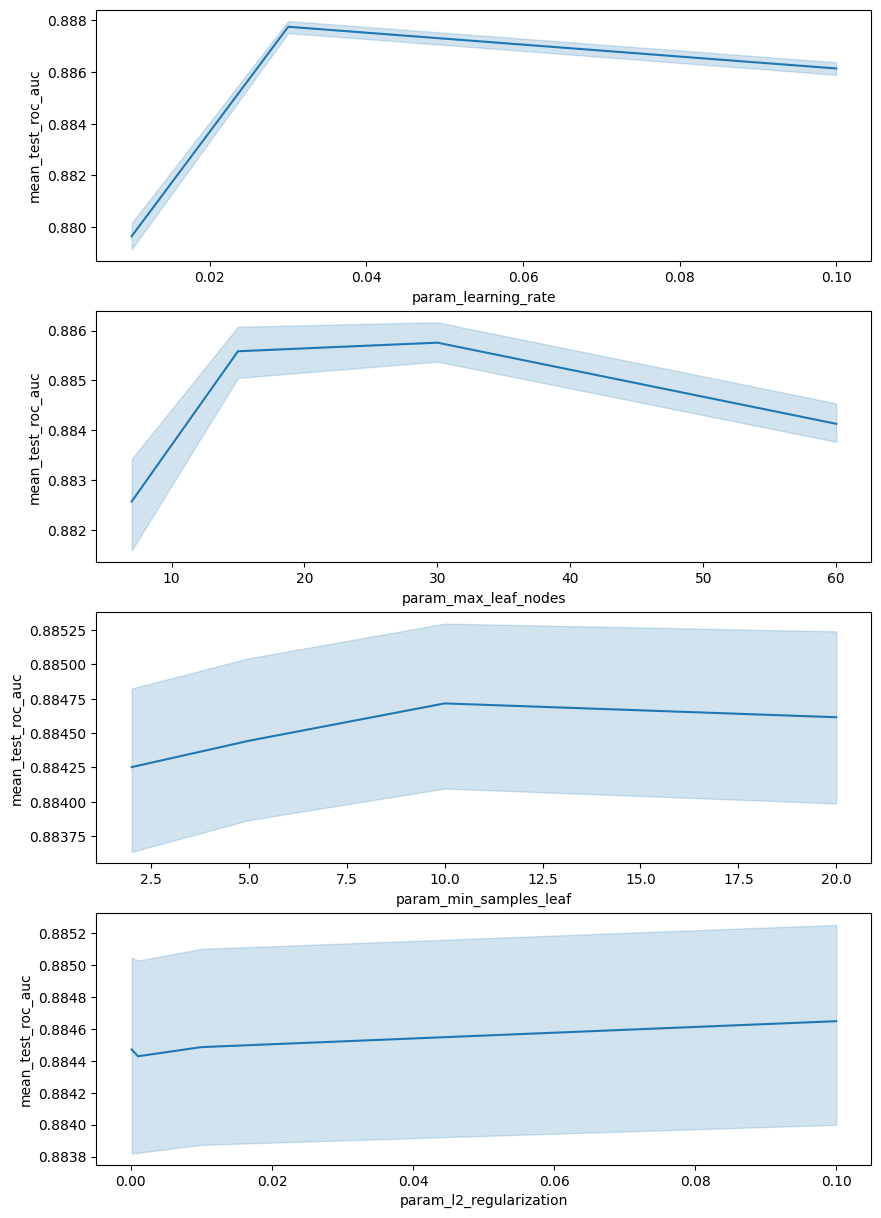

In [84]:
fig, ax = plt.subplots(4,1, figsize=(10, 15))
sb.lineplot(data=hgb_cv_results, x='param_learning_rate', y='mean_test_roc_auc', ax=ax[0])
sb.lineplot(data=hgb_cv_results, x='param_max_leaf_nodes', y='mean_test_roc_auc', ax=ax[1])
sb.lineplot(data=hgb_cv_results, x='param_min_samples_leaf', y='mean_test_roc_auc', ax=ax[2])
sb.lineplot(data=hgb_cv_results, x='param_l2_regularization', y='mean_test_roc_auc', ax=ax[3])

Gradient Boosting ser ut til å fungere best på omtrent 0.03 learning_rate og 15-30 max_leaf_nodes. Min_samples_leaf er omtrent like god på 10 og 20, mens l2_regularization ser ut til å kunne være bedre på en høyere verdi.

### Hist Gradient Boosting; forbedret parametere

In [85]:
hgb_params2 = {
    'learning_rate': [0.02, 0.03, 0.04],
    'max_leaf_nodes': [10, 15, 20, 25, 30, 35],
    'min_samples_leaf': [8, 10, 15, 20],
    'l2_regularization': [0.03, 0.07, 0.1],
}

In [86]:
hgb_estimators2, hgb_scores2, hgb_cv_results2 = train(
    HistGradientBoostingClassifier(random_state=global_random_state),
    hgb_params2, 
    dataset_features, 
    targets_encoded
    )
hgb_scores2 = pd.DataFrame(hgb_scores2)
hgb_scores2.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.779387,0.734012,0.700393,0.711236,0.895455
std,0.012503,0.019430,0.019557,0.020456,0.009287
min,0.764972,0.712547,0.676015,0.686057,0.885191
25%,0.774011,0.722409,0.688676,0.698873,0.888975
50%,0.774011,0.726552,0.698156,0.707997,0.894087
75%,0.787330,0.749924,0.714145,0.726892,0.900522
max,0.796610,0.758626,0.724974,0.736362,0.908498


<Axes: xlabel='param_l2_regularization', ylabel='mean_test_roc_auc'>

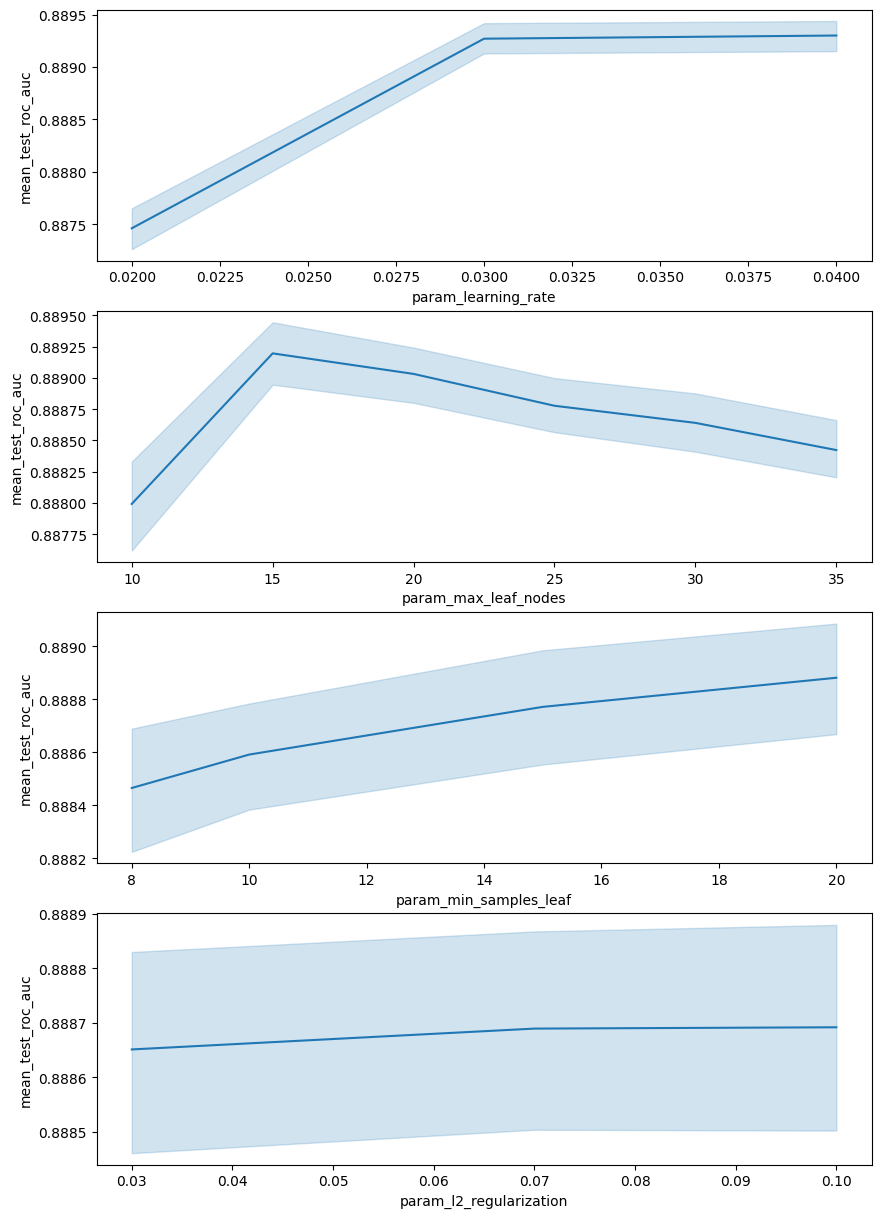

In [91]:
fig, ax = plt.subplots(4,1, figsize=(10, 15))
sb.lineplot(data=hgb_cv_results2, x='param_learning_rate', y='mean_test_roc_auc', ax=ax[0])
sb.lineplot(data=hgb_cv_results2, x='param_max_leaf_nodes', y='mean_test_roc_auc', ax=ax[1])
sb.lineplot(data=hgb_cv_results2, x='param_min_samples_leaf', y='mean_test_roc_auc', ax=ax[2])
sb.lineplot(data=hgb_cv_results2, x='param_l2_regularization', y='mean_test_roc_auc', ax=ax[3])

Jeg har forbedret precision og de andre metrikkene, og standardavviket er lavere. Grafene tyder fortsatt på at parametere kan forbedres.

### Hist Gradient Boosting; forbedret parametere

In [92]:
hgb_params3 = {
    'learning_rate': [0.03, 0.04, 0.05],
    'max_leaf_nodes': [10, 12, 15, 18],
    'min_samples_leaf': [15, 18, 20, 25],
    'l2_regularization': [0.03, 0.05, 0.08, 0.1],
}

In [93]:
hgb_estimators3, hgb_scores3, hgb_cv_results3 = train(
    HistGradientBoostingClassifier(random_state=global_random_state),
    hgb_params3, 
    dataset_features, 
    targets_encoded
    )
hgb_scores3 = pd.DataFrame(hgb_scores3)
hgb_scores3.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.779614,0.735446,0.699768,0.710663,0.896926
std,0.015031,0.022540,0.022573,0.023626,0.011054
min,0.759322,0.704518,0.666036,0.675389,0.883885
25%,0.775141,0.724604,0.690437,0.701197,0.890126
50%,0.775141,0.733530,0.703357,0.714038,0.894865
75%,0.790724,0.757203,0.716246,0.727353,0.904107
max,0.797740,0.757377,0.722766,0.735340,0.911646


<Axes: xlabel='param_l2_regularization', ylabel='mean_test_roc_auc'>

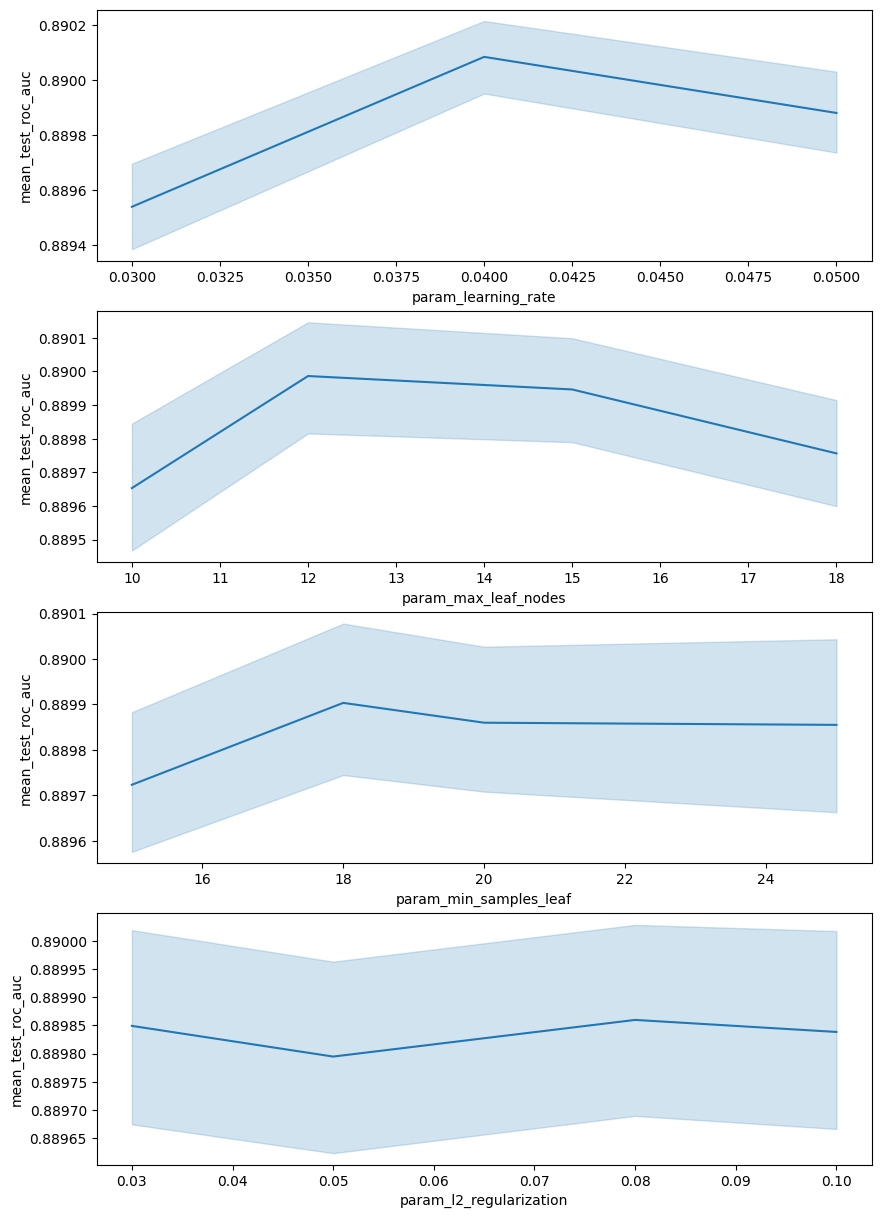

In [94]:
fig, ax = plt.subplots(4,1, figsize=(10, 15))
sb.lineplot(data=hgb_cv_results3, x='param_learning_rate', y='mean_test_roc_auc', ax=ax[0])
sb.lineplot(data=hgb_cv_results3, x='param_max_leaf_nodes', y='mean_test_roc_auc', ax=ax[1])
sb.lineplot(data=hgb_cv_results3, x='param_min_samples_leaf', y='mean_test_roc_auc', ax=ax[2])
sb.lineplot(data=hgb_cv_results3, x='param_l2_regularization', y='mean_test_roc_auc', ax=ax[3])

Grafene viser at jeg har funnet de omtrent beste verdiene.

In [95]:
columns = [
    'param_learning_rate',
    'param_max_leaf_nodes',
    'param_min_samples_leaf',
    'param_l2_regularization',
    'mean_test_roc_auc'
]

hgb_cv_results3_sorted = (
    hgb_cv_results3[columns].groupby(['param_learning_rate', 'param_max_leaf_nodes', 'param_min_samples_leaf', 'param_l2_regularization'],
        as_index=False)['mean_test_roc_auc'].mean().sort_values('mean_test_roc_auc', ascending=False)
)

hgb_cv_results3_sorted.head()

,param_learning_rate,param_max_leaf_nodes,param_min_samples_leaf,param_l2_regularization,mean_test_roc_auc
108,0.04,15,25,0.03,0.890743
92,0.04,12,25,0.03,0.890646
153,0.05,12,20,0.05,0.890628
102,0.04,15,18,0.08,0.890592
119,0.04,18,18,0.10,0.890581


Modellen fungerer i snitt best med 0.04 learning_rate, 15 max_leaf nodes, 25 min_samples_leaf og 0.03 l2_regularization.

### Hist Gradient Boosting; endelige parametere

In [96]:
hgb_params_final = {
    'learning_rate': [0.04],
    'max_leaf_nodes': [15],
    'min_samples_leaf': [25],
    'l2_regularization': [0.03],
}

In [97]:
hgb_estimators_final, hgb_scores_final, hgb_cv_results_final = train(
    HistGradientBoostingClassifier(random_state=global_random_state),
    hgb_params_final, 
    dataset_features, 
    targets_encoded
    )
hgb_scores_final = pd.DataFrame(hgb_scores_final)
hgb_scores_final.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.781196,0.737980,0.701449,0.712740,0.896659
std,0.014311,0.024414,0.021894,0.023576,0.010895
min,0.760452,0.704592,0.668049,0.677208,0.883732
25%,0.776271,0.723473,0.692869,0.702563,0.888029
50%,0.780791,0.740464,0.706288,0.717989,0.897463
75%,0.790724,0.757377,0.717272,0.730601,0.904107
max,0.797740,0.763992,0.722766,0.735340,0.909967


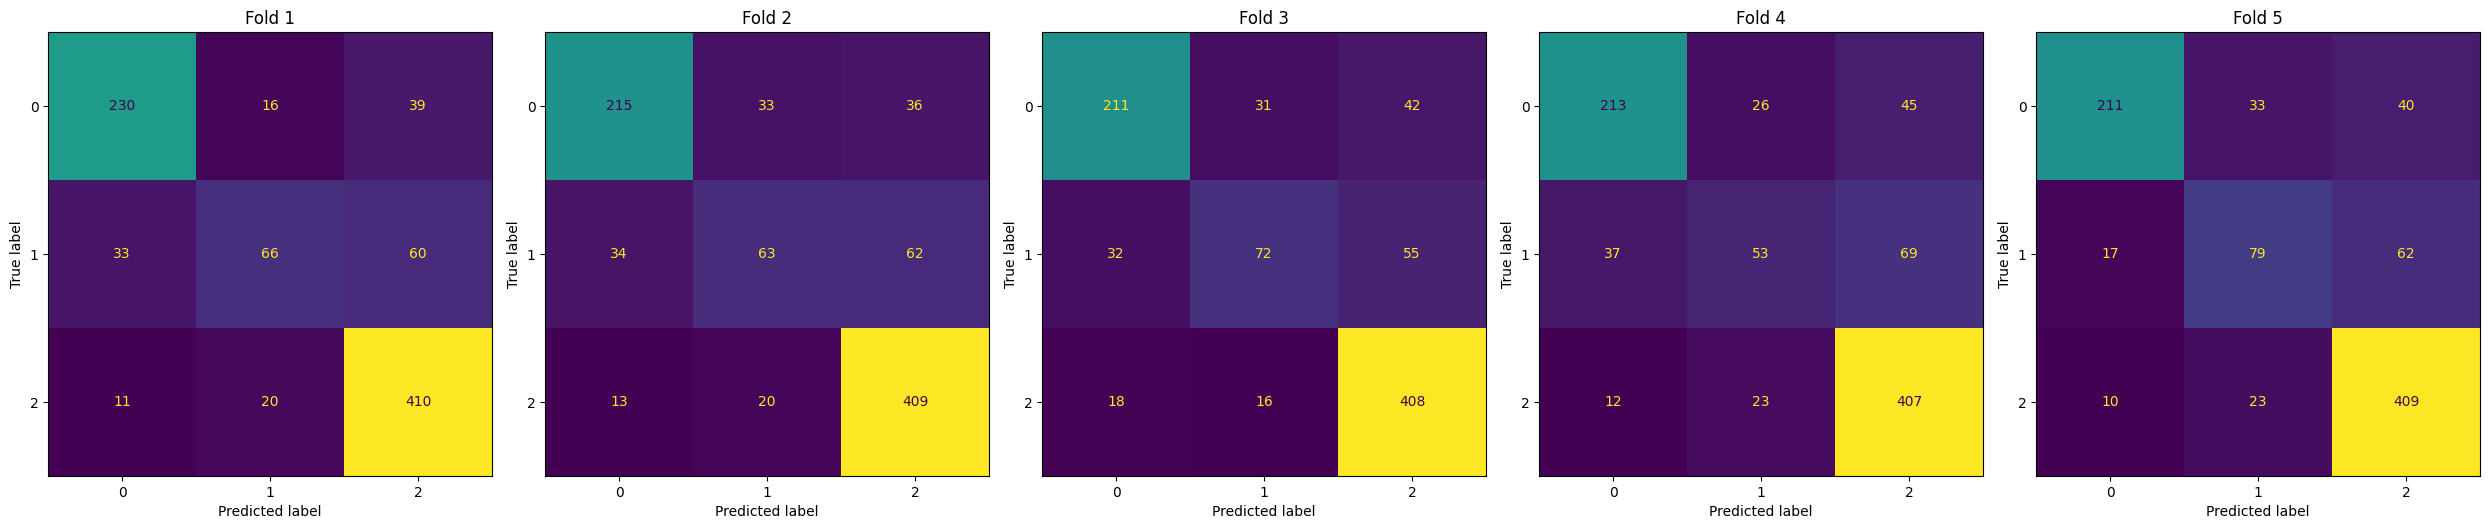

In [98]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, ((train_index, test_index), estimator) in enumerate(
        zip(outer_cv.split(dataset_features, targets_encoded), hgb_estimators_final)):

    ConfusionMatrixDisplay.from_estimator(
        estimator,
        dataset_features.iloc[test_index],
        targets_encoded.iloc[test_index],
        ax=axs[i],
        colorbar=False
    )
    axs[i].set_title(f"Fold {i+1}")

plt.tight_layout()
plt.show()

Modellen gir ganske stabile resultater på tvers av folds. Modellen er klart best på å predikere klasse 2, ganske god på klasse 0, men svært dårlig på klasse 1. Dette samsvarer med klassefordelingen, ettersom det finnes flest som fullfører, litt færre som går på studiet, og færrest som dropper ut.

### Multinomonal Naive Bayes

In [100]:
mnb_pipe = Pipeline([
        ('enc', encode),       
        ('nb', MultinomialNB())
    ])

In [101]:
mnb_params = {
    "nb__alpha": [1e-3, 1e-2, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0],
    "nb__fit_prior": [True, False]
}

For Multinominal Naive Bayes er det hovedsakelig alpha som bør tunes, men jeg velger også å teste fit_prior. Jeg har forsøkt å starte med å teste brede verdier.

Jeg tunet alpha ettersom den legger til en verdi for å kunne predikere klasser og features som ikke forekommer i treningsdataen. Dette er spesielt viktig ettersom mange features er encodet. En lav verdi vil kunne finne mer komplekse mønstre, men kan føre til overfitting. En høyere verdi vil kunne gjøre modellen mer robust, spesielt for features som ikke finnes i treningsdataen, men kan føre til underfitting.

Fit_prior satt til True vil gjøre at modellen vet at klassene er ubalanserte, noe som vil kunne gjøre den bedre på å predikere majoritetsklassen, men kan samtidig føre til at den blir dårlig på de sjeldnere klassene. Satt til False så antar modellen at klassene er like vanlige, noe som kan føre til at de sjeldnere klassene vil kunne bli predikert bedre, men kan samtidig føre til at nøyaktigheten blir dårligere totalt sett

In [102]:
mnb_estimators, mnb_scores, mnb_cv_results = train(
    mnb_pipe,
    mnb_params,
    nb_features,
    targets_encoded
)
mnb_scores = pd.DataFrame(mnb_scores)
mnb_scores.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.696653,0.652359,0.633362,0.637395,0.815656
std,0.010222,0.015630,0.015258,0.014119,0.012807
min,0.683616,0.634734,0.616595,0.621299,0.796583
25%,0.688914,0.643380,0.623548,0.629532,0.814421
50%,0.698305,0.646140,0.628201,0.631625,0.815925
75%,0.705085,0.666705,0.645815,0.651472,0.818972
max,0.707345,0.670836,0.652652,0.653048,0.832380


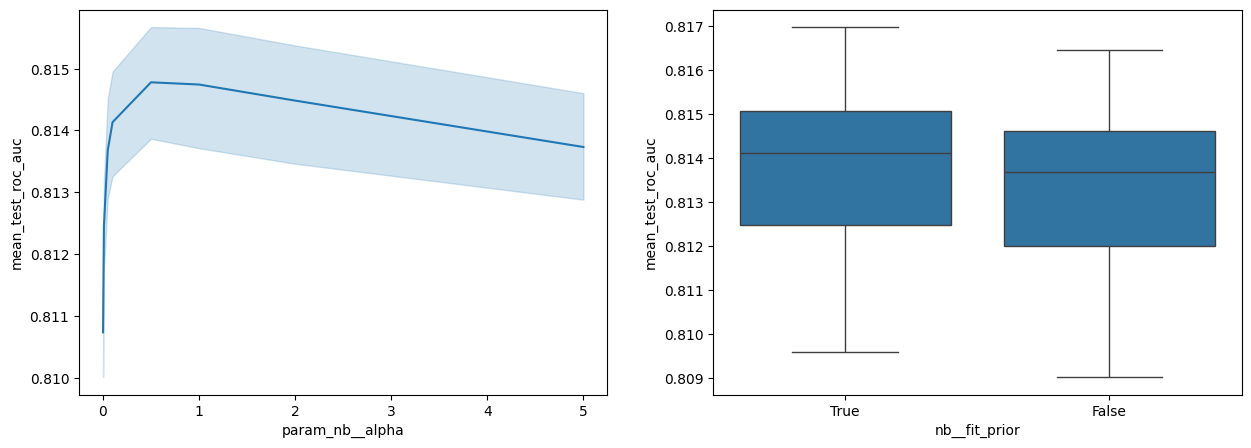

In [107]:
mnb_cv_results_plot = mnb_cv_results.copy()
mnb_cv_results_plot['nb__fit_prior'] = mnb_cv_results_plot['param_nb__fit_prior'].fillna('None').astype(str)

fig, ax = plt.subplots(1,2, figsize=(15, 5))
sb.lineplot(data=mnb_cv_results, x='param_nb__alpha', y='mean_test_roc_auc', ax=ax[0])
sb.boxplot(data=mnb_cv_results_plot, x='nb__fit_prior', y='mean_test_roc_auc', ax=ax[1])
ax[0].ticklabel_format(style='plain', axis='x')
plt.show()

Multinominal NB ser ut til å fungere bedre på en alpha-verdi rundt 0.5, og litt bedre med fit_prior.

### Multinominal Naive Bayes; forbedret parametere

In [108]:
mnb_params2 = {
    "nb__alpha": [0.1, 0.3, 0.5, 0.8, 1.0],
    "nb__fit_prior": [True, False]
}

In [109]:
mnb_estimators2, mnb_scores2, mnb_cv_results2 = train(
    mnb_pipe,
    mnb_params2,
    nb_features,
    targets_encoded
)
mnb_scores2 = pd.DataFrame(mnb_scores2)
mnb_scores2.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.696201,0.651957,0.632977,0.636953,0.815549
std,0.010367,0.015576,0.015104,0.013990,0.012798
min,0.682486,0.633815,0.615841,0.620463,0.796435
25%,0.688914,0.643380,0.623548,0.629532,0.814243
50%,0.698305,0.646140,0.628201,0.631625,0.815925
75%,0.703955,0.666705,0.645815,0.651472,0.818972
max,0.707345,0.669743,0.651478,0.651673,0.832169


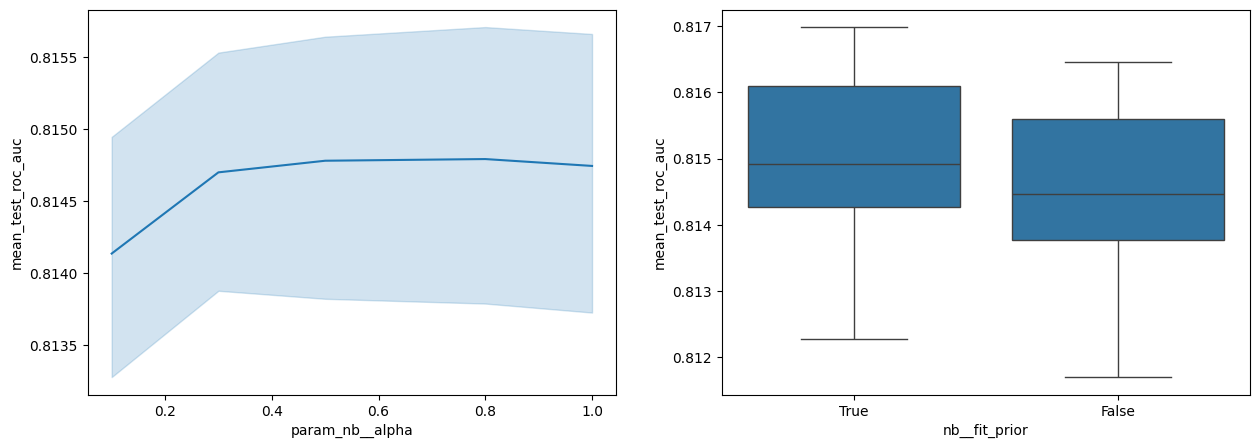

In [110]:
mnb_cv_results_plot2 = mnb_cv_results2.copy()
mnb_cv_results_plot2['nb__fit_prior'] = mnb_cv_results_plot2['param_nb__fit_prior'].fillna('None').astype(str)

fig, ax = plt.subplots(1,2, figsize=(15, 5))
sb.lineplot(data=mnb_cv_results2, x='param_nb__alpha', y='mean_test_roc_auc', ax=ax[0])
sb.boxplot(data=mnb_cv_results_plot2, x='nb__fit_prior', y='mean_test_roc_auc', ax=ax[1])
ax[0].ticklabel_format(style='plain', axis='x')
plt.show()

Grafene viser at jeg har funnet de omtrent beste parameterene.

In [111]:
columns = [
    'param_nb__alpha',
    'param_nb__fit_prior',
    'mean_test_roc_auc'
]

mnb_cv_results2_sorted = (
    mnb_cv_results2[columns].groupby(['param_nb__alpha', 'param_nb__fit_prior'],
        as_index=False)['mean_test_roc_auc'].mean().sort_values('mean_test_roc_auc', ascending=False)
)

mnb_cv_results2_sorted.head()

,param_nb__alpha,param_nb__fit_prior,mean_test_roc_auc
5,0.5,True,0.815017
7,0.8,True,0.815006
9,1.0,True,0.814963
3,0.3,True,0.814945
6,0.8,False,0.814575


De beste hyperparameterene er 0.5 alpha og fit_prior satt til True.

### Multinominal Naive Bayes; endelige parametere

In [112]:
mnb_params_final = {
    "nb__alpha": [0.5],
    "nb__fit_prior": [True]
}

In [113]:
mnb_estimators_final, mnb_scores_final, mnb_cv_results_final = train(
    mnb_pipe,
    mnb_params_final,
    nb_features,
    targets_encoded
)
mnb_scores_final = pd.DataFrame(mnb_scores_final)
mnb_scores_final.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.696653,0.653182,0.634789,0.638541,0.815616
std,0.011625,0.015487,0.014659,0.013936,0.012904
min,0.680226,0.633240,0.615675,0.619892,0.796331
25%,0.688914,0.646140,0.628201,0.631625,0.814421
50%,0.701695,0.648987,0.631599,0.636667,0.815925
75%,0.705085,0.666705,0.645815,0.651472,0.819022
max,0.707345,0.670836,0.652652,0.653048,0.832380


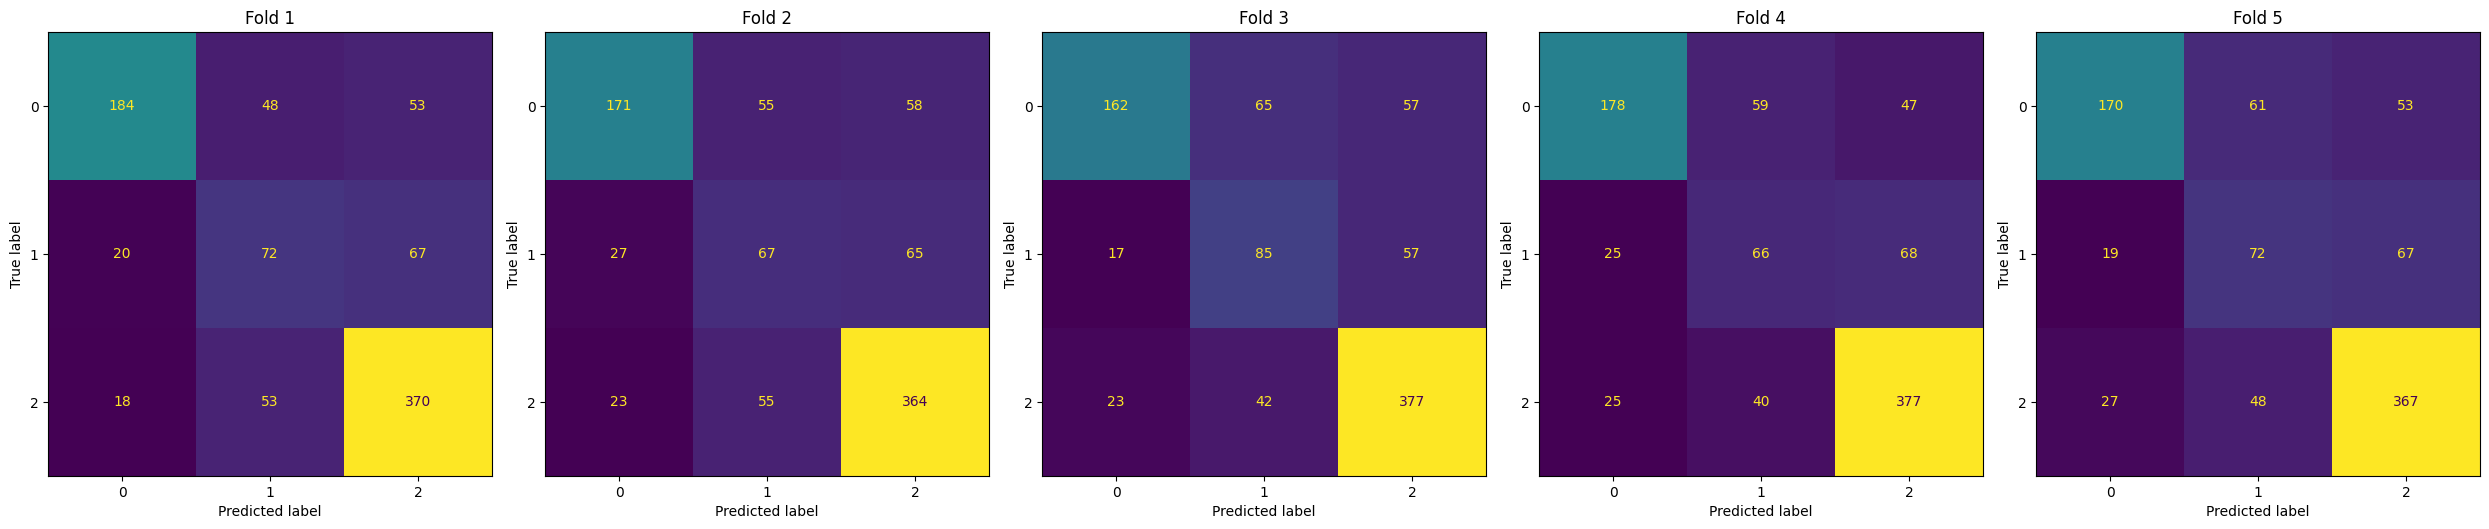

In [114]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, ((train_index, test_index), estimator) in enumerate(
        zip(outer_cv.split(nb_features, targets_encoded), mnb_estimators_final)):

    ConfusionMatrixDisplay.from_estimator(
        estimator,
        nb_features.iloc[test_index],
        targets_encoded.iloc[test_index],
        ax=axs[i],
        colorbar=False
    )
    axs[i].set_title(f"Fold {i+1}")

plt.tight_layout()
plt.show()

Modellen gir her også relativt stabile resultater på tvers av folds. Det er også tydelig at den predikerer de sjeldnere klassene dårligere.

### Complement Naive Bayes

In [117]:
cnb_pipe = Pipeline([
        ('enc', encode),       
        ('nb', ComplementNB())
    ])

In [118]:
cnb_params = {
    "nb__alpha": [1e-3, 1e-2, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0],
    "nb__fit_prior": [True, False]
}

For Complement Naive Bayes så tuner jeg de samme hyperparameterene som for Multinominal. Denne modellen bør håndtere ubalanse bedre.

In [119]:
cnb_estimators, cnb_scores, cnb_cv_results = train(
    cnb_pipe,
    cnb_params,
    nb_features,
    targets_encoded
)
cnb_scores = pd.DataFrame(cnb_scores)
cnb_scores.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.693034,0.659046,0.559561,0.531218,0.815487
std,0.012178,0.048704,0.011051,0.014423,0.011595
min,0.676471,0.597126,0.546479,0.515643,0.801129
25%,0.689266,0.633343,0.553255,0.520339,0.809419
50%,0.691525,0.653704,0.557028,0.527568,0.812171
75%,0.698305,0.687592,0.566586,0.544726,0.826364
max,0.709605,0.723467,0.574455,0.547812,0.828352


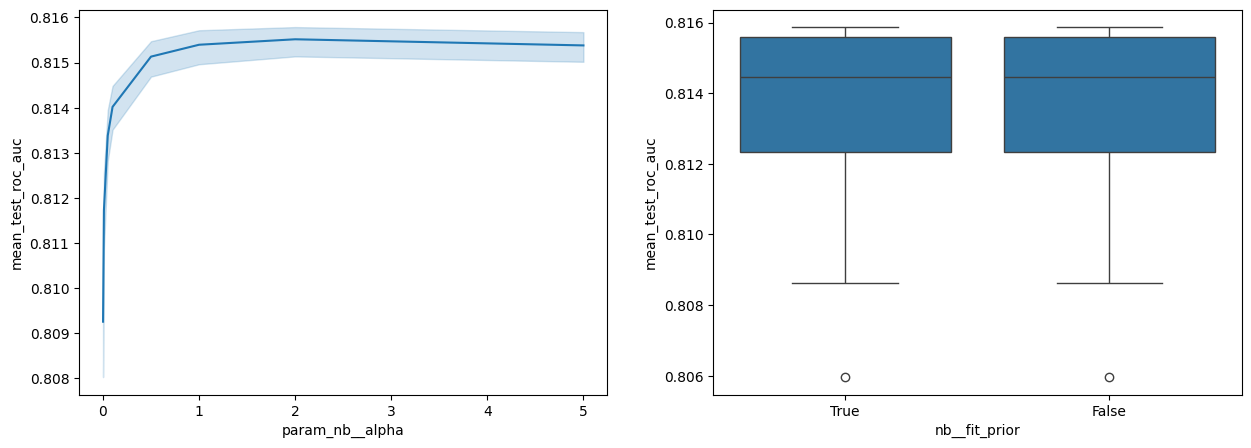

In [120]:
cnb_cv_results_plot = cnb_cv_results.copy()
cnb_cv_results_plot['nb__fit_prior'] = cnb_cv_results_plot['param_nb__fit_prior'].fillna('None').astype(str)

fig, ax = plt.subplots(1,2, figsize=(15, 5))
sb.lineplot(data=cnb_cv_results, x='param_nb__alpha', y='mean_test_roc_auc', ax=ax[0])
sb.boxplot(data=cnb_cv_results_plot, x='nb__fit_prior', y='mean_test_roc_auc', ax=ax[1])
ax[0].ticklabel_format(style='plain', axis='x')
plt.show()

Complement ser ut til å fungere bedre med en alpha-verdi rundt 2, men fit_prior kan se ut til å fungere godt med både True og False.

### Complement Naive Bayes; forbedret parametere

In [121]:
cnb_params2 = {
    "nb__alpha": [0.8, 1.0, 1.5, 2, 2.5, 3, 4, 5],
    "nb__fit_prior": [True, False]
}

In [122]:
cnb_estimators2, cnb_scores2, cnb_cv_results2 = train(
    cnb_pipe,
    cnb_params2,
    nb_features,
    targets_encoded
)
cnb_scores2 = pd.DataFrame(cnb_scores2)
cnb_scores2.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.692808,0.657642,0.559141,0.530438,0.815515
std,0.012065,0.047767,0.010754,0.013369,0.011576
min,0.676471,0.597126,0.546479,0.515643,0.801135
25%,0.689266,0.633343,0.553255,0.520339,0.809553
50%,0.691525,0.653704,0.557028,0.527568,0.812171
75%,0.697175,0.680569,0.564490,0.543914,0.826364
max,0.709605,0.723467,0.574455,0.544726,0.828352


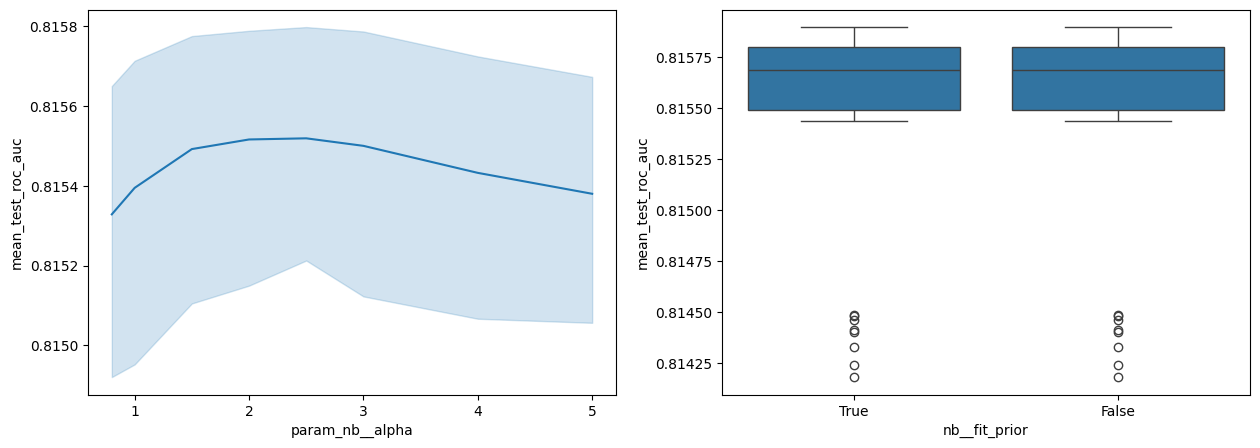

In [123]:
cnb_cv_results_plot2 = cnb_cv_results2.copy()
cnb_cv_results_plot2['nb__fit_prior'] = cnb_cv_results_plot2['param_nb__fit_prior'].fillna('None').astype(str)

fig, ax = plt.subplots(1,2, figsize=(15, 5))
sb.lineplot(data=cnb_cv_results2, x='param_nb__alpha', y='mean_test_roc_auc', ax=ax[0])
sb.boxplot(data=cnb_cv_results_plot2, x='nb__fit_prior', y='mean_test_roc_auc', ax=ax[1])
ax[0].ticklabel_format(style='plain', axis='x')
plt.show()

Det ser ut til at jeg har funnet de omtrent beste hyperparameterene

In [124]:
columns = [
    'param_nb__alpha',
    'param_nb__fit_prior',
    'mean_test_roc_auc'
]

cnb_cv_results2_sorted = (
    cnb_cv_results2[columns].groupby(['param_nb__alpha', 'param_nb__fit_prior'],
        as_index=False)['mean_test_roc_auc'].mean().sort_values('mean_test_roc_auc', ascending=False)
)

cnb_cv_results2_sorted.head()

,param_nb__alpha,param_nb__fit_prior,mean_test_roc_auc
8,2.5,False,0.815519
9,2.5,True,0.815519
6,2.0,False,0.815516
7,2.0,True,0.815516
10,3.0,False,0.815500


Complement Naive Bayes fungerer best med 2.5 alpha, og fit_prior ser ikke ut til å ha noen betydning. Velger å bruke True siden dette er standard.

In [126]:
cnb_params_final = {
    "nb__alpha": [2.5]
}

In [127]:
cnb_estimators_final, cnb_scores_final, cnb_cv_results_final = train(
    cnb_pipe,
    cnb_params_final,
    nb_features,
    targets_encoded
)
cnb_scores_final = pd.DataFrame(cnb_scores_final)
cnb_scores_final.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.692808,0.659183,0.558957,0.529858,0.815580
std,0.011662,0.043644,0.009987,0.012335,0.011711
min,0.676471,0.597126,0.546479,0.515709,0.801106
25%,0.689266,0.648291,0.553255,0.520339,0.809553
50%,0.692655,0.654446,0.558202,0.528575,0.812097
75%,0.697175,0.680569,0.564490,0.540749,0.826335
max,0.708475,0.715483,0.572359,0.543914,0.828807


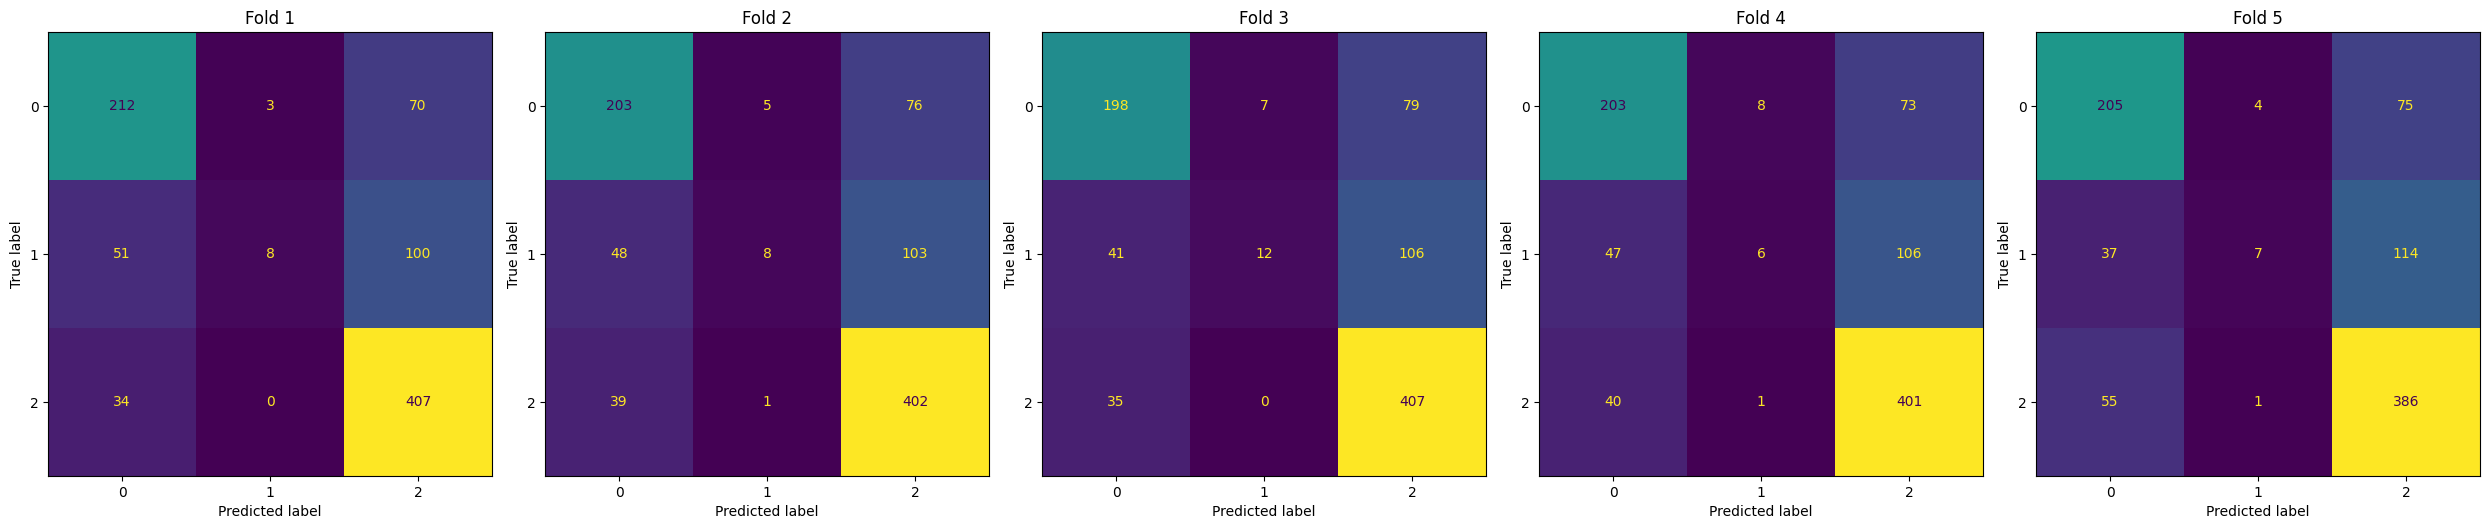

In [128]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, ((train_index, test_index), estimator) in enumerate(
        zip(outer_cv.split(nb_features, targets_encoded), cnb_estimators_final)):

    ConfusionMatrixDisplay.from_estimator(
        estimator,
        nb_features.iloc[test_index],
        targets_encoded.iloc[test_index],
        ax=axs[i],
        colorbar=False
    )
    axs[i].set_title(f"Fold {i+1}")

plt.tight_layout()
plt.show()

Complement var overraskende nok bedre på å predikere majoritetsklassene enn den sjeldne klassen. Dette har trolig med hvordan datasettet er å gjøre. Dette gjør Complement uaktuell for eventuell threshold tuning videre sammenlignet med Multinominal, ettersom det er minoritetsklassen som er viktigst etter min mening.

### SVC

In [115]:
svc_pipe = Pipeline([
        ('scale_encode', scale_and_encode),     
        ('svc', SVC(probability=True, random_state=global_random_state))
    ])

svc_params = {
    "svc__C": [0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.001, 0.01, 0.1],
    'svc__class_weight': [None, "balanced"]
}

For SVC så valgte jeg å teste 3 ulike hyperparametere. Gamma og C-verdi skal generelt sett påvirke modellen mest, og class_weight valgte å teste ettersom klassefordelingen er skjev.

Parameteren C bestemmer hvor mye modellen skal straffe feil. En lav C-verdi vil gjøre modellen mer robust som vil gjøre overfitting mindre sannsynlig, men kan føre til at presisjonen ettersom den kan skille mønstre for dårlig. En høy C-verdi vil gjøre modellen mer kompleks, slik at den skiller mønstre bedre, men det kan samtidig føre til overfitting ettersom den kan bli for følsom for støy.

Gamma bestemmer hvor langt unna et datapunkt kan påvirke. En lav Gamma-verdi vil kunne gjøre modellen mer stabil og gjøre overfitting mindre sannsylig, men kan samtidig føre til at modellen ikke fanger nok mønstre. En høy Gamma-verdi vil gjøre modellen mer fleksibel ettersom den kan fange opp små detaljer, men den kan samtidig fort bli overfittet ettersom den lettere blir sensitiv for støy. 

Class_weight bestemmer om modellen skal gi mer vekt til enkelte klasser. Om den er satt til None vil modellen være stabil ettersom den ikke gir ekstra vekt til noen klasser, men samtidig så vil den kunne predikere dårlig på sjeldne klasser dersom dataen er ubalansert. Dersom den er satt til balanced så vil ikke de største klassene dominere i et ubalansert datasett som dette, og den vil kunne predikere sjeldnere klasser bedre, men det kan samtidig føre til at den predikerer for dårlig på de større klassene, spesielt dersom datasettet er for balansert.

In [116]:
svc_estimators, svc_scores, svc_cv_results = train(
    svc_pipe, 
    svc_params,
    dataset_features,
    targets_encoded
    )
svc_scores = pd.DataFrame(svc_scores)
svc_scores.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.754973,0.721112,0.726288,0.716898,0.894305
std,0.017450,0.020397,0.023840,0.021718,0.009810
min,0.733333,0.693016,0.695586,0.689077,0.884310
25%,0.743503,0.711467,0.713028,0.704280,0.891361
50%,0.756787,0.724034,0.727123,0.718221,0.892031
75%,0.762712,0.729386,0.737259,0.726795,0.893094
max,0.778531,0.747659,0.758443,0.746117,0.910728


<Axes: xlabel='class_weight', ylabel='mean_test_roc_auc'>

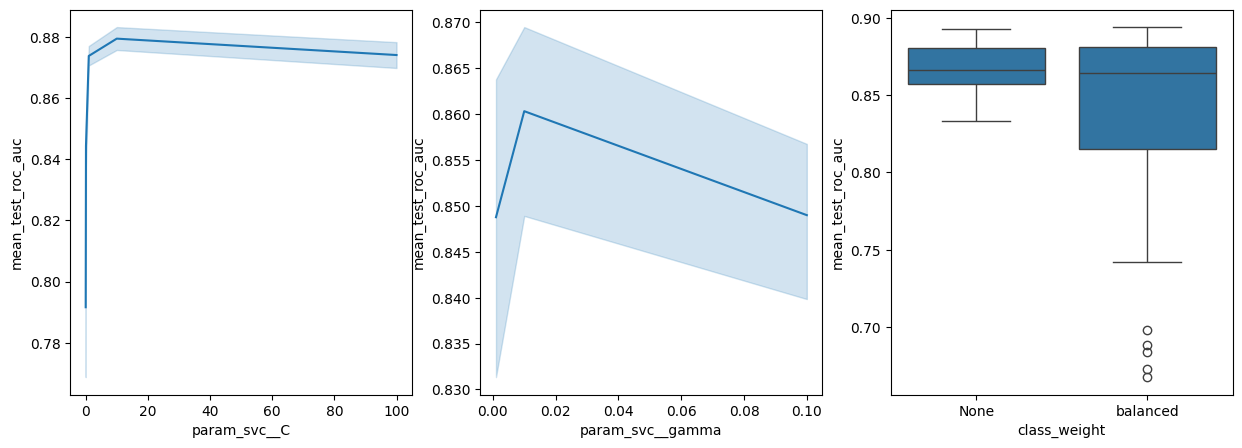

In [133]:
svc_cv_results_plot = svc_cv_results.copy()
svc_cv_results_plot['class_weight'] = svc_cv_results_plot['param_svc__class_weight'].fillna('None').astype(str)
fig, ax = plt.subplots(1,3, figsize=(15, 5))
sb.lineplot(data=svc_cv_results_plot, x='param_svc__C', y='mean_test_roc_auc', ax=ax[0])
sb.lineplot(data=svc_cv_results_plot, x='param_svc__gamma', y='mean_test_roc_auc', ax=ax[1])
sb.boxplot(data=svc_cv_results_plot, x='class_weight', y='mean_test_roc_auc', ax=ax[2])

Metrikkene viser at en c-verdi rundt 10 er best. En gamma rundt 0.01 ser ut til å være best. Det ser også ut som at modellene oftest fungerer best med ubalansert class_weight.

### SVC; forbedret parametere

In [134]:
svc_params2 = {
    "svc__C": [1, 10, 20, 30, 40, 50],
    "svc__gamma": [0.001, 0.005, 0.01, 0.05],
    'svc__class_weight': [None, "balanced"]
}

In [135]:
svc_estimators2, svc_scores2, svc_cv_results2 = train(
    svc_pipe, 
    svc_params2,
    dataset_features,
    targets_encoded
    )
svc_scores2 = pd.DataFrame(svc_scores2)
svc_scores2.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.752711,0.719137,0.722552,0.713802,0.893908
std,0.016826,0.018280,0.022217,0.020399,0.009322
min,0.728814,0.692176,0.690472,0.684291,0.884476
25%,0.747738,0.714739,0.715288,0.708544,0.890273
50%,0.750282,0.717043,0.721187,0.711233,0.892427
75%,0.763842,0.732224,0.737341,0.726895,0.892892
max,0.772881,0.739503,0.748474,0.738049,0.909471


<Axes: xlabel='class_weight', ylabel='mean_test_roc_auc'>

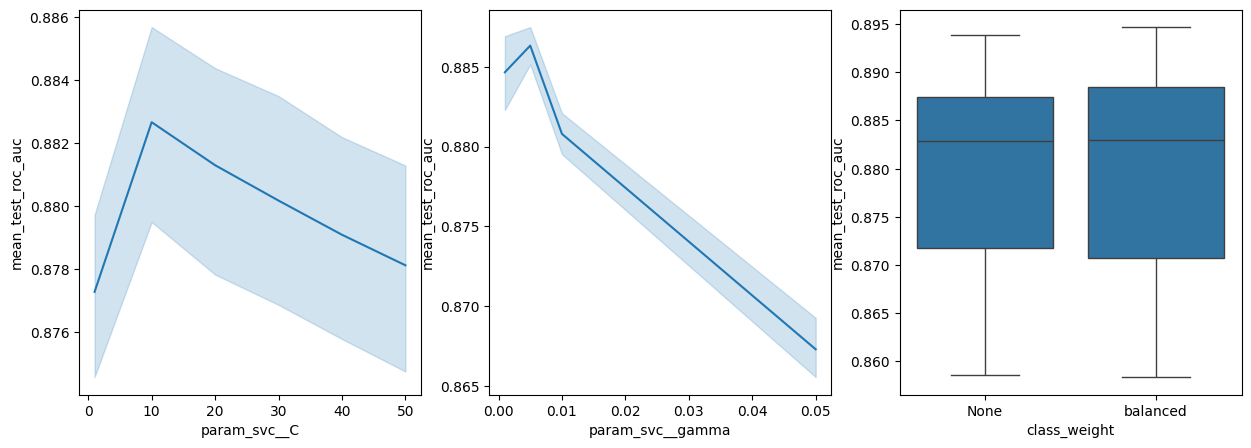

In [136]:
svc_cv_results_plot2 = svc_cv_results2.copy()
svc_cv_results_plot2['class_weight'] = svc_cv_results_plot2['param_svc__class_weight'].fillna('None').astype(str)
fig, ax = plt.subplots(1,3, figsize=(15, 5))
sb.lineplot(data=svc_cv_results_plot2, x='param_svc__C', y='mean_test_roc_auc', ax=ax[0])
sb.lineplot(data=svc_cv_results_plot2, x='param_svc__gamma', y='mean_test_roc_auc', ax=ax[1])
sb.boxplot(data=svc_cv_results_plot2, x='class_weight', y='mean_test_roc_auc', ax=ax[2])

Grafene viser at jeg bør fintune modellen rundt 10 på gamma og rundt 0.05 på c. Modellene med balanced class_weight ser ut til å prestere bedre.

### SVC; forbedret parametere

In [137]:
svc_params3 = {
    "svc__C": [3, 5, 8, 10, 12],
    "svc__gamma": [0.001, 0.003, 0.005, 0.008, 0.01],
    "svc__class_weight" : [None, "balanced"]
}

In [138]:
svc_estimators3, svc_scores3, svc_cv_results3 = train(
    svc_pipe, 
    svc_params3,
    dataset_features,
    targets_encoded
    )
svc_scores3 = pd.DataFrame(svc_scores3)
svc_scores3.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.756100,0.723351,0.727462,0.718214,0.894502
std,0.015961,0.017030,0.020431,0.019131,0.008869
min,0.740113,0.704605,0.706403,0.698318,0.885949
25%,0.744344,0.714959,0.716462,0.707369,0.891096
50%,0.751412,0.715142,0.717150,0.709750,0.891912
75%,0.766102,0.736221,0.741534,0.730393,0.894118
max,0.778531,0.745828,0.755762,0.745242,0.909436


<Axes: xlabel='class_weight', ylabel='mean_test_roc_auc'>

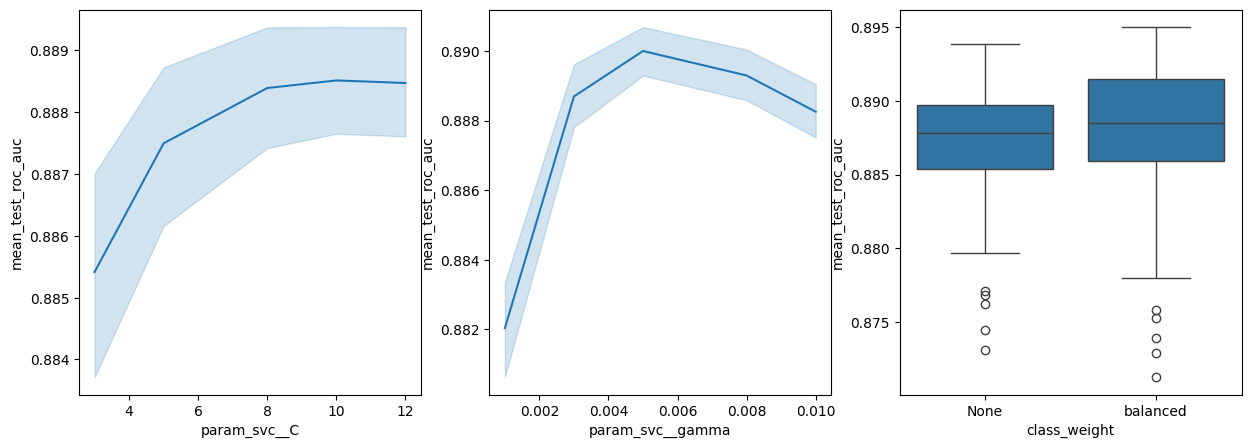

In [139]:
svc_cv_results_plot3 = svc_cv_results3.copy()
svc_cv_results_plot3['class_weight'] = svc_cv_results_plot3['param_svc__class_weight'].fillna('None').astype(str)
fig, ax = plt.subplots(1,3, figsize=(15, 5))
sb.lineplot(data=svc_cv_results_plot3, x='param_svc__C', y='mean_test_roc_auc', ax=ax[0])
sb.lineplot(data=svc_cv_results_plot3, x='param_svc__gamma', y='mean_test_roc_auc', ax=ax[1])
sb.boxplot(data=svc_cv_results_plot3, x='class_weight', y='mean_test_roc_auc', ax=ax[2])

Grafene viser at jeg har funnet de omtrent beste parameterene.

In [143]:
columns = [
    'param_svc__C',
    'param_svc__gamma',
    'param_svc__class_weight',
    'mean_test_roc_auc'
]

svc_cv_results3_sorted = (
    svc_cv_results3[columns].groupby(['param_svc__C', 'param_svc__gamma', 'param_svc__class_weight'],
        as_index=False)['mean_test_roc_auc'].mean().sort_values('mean_test_roc_auc', ascending=False)
)

svc_cv_results3_sorted.head()

,param_svc__C,param_svc__gamma,param_svc__class_weight,mean_test_roc_auc
17,10,0.005,balanced,0.891522
22,12,0.005,balanced,0.891386
12,8,0.005,balanced,0.891386
21,12,0.003,balanced,0.891367
16,10,0.003,balanced,0.890963


De beste parameterene ser ut til å være en C-verdi på 10, gamma på 0.005 og class_weight balanced. At den liker balansering av datasettet gir mening ettersom datasettet er såpass ubalansert.

### SVC; endelige parametere

In [147]:
svc_params_final = {
    "svc__C": [10],
    "svc__gamma": [0.005],
    "svc__class_weight" : ['balanced']
}

In [148]:
svc_estimators_final, svc_scores_final, svc_cv_results_final = train(
    svc_pipe, 
    svc_params_final,
    dataset_features,
    targets_encoded
    )
svc_scores_final = pd.DataFrame(svc_scores_final)
svc_scores_final.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.754748,0.721046,0.724162,0.715561,0.894293
std,0.016689,0.018504,0.022385,0.020501,0.009173
min,0.728814,0.692176,0.690472,0.684291,0.884476
25%,0.750282,0.714739,0.715288,0.708544,0.892200
50%,0.757919,0.726591,0.729233,0.720027,0.892427
75%,0.763842,0.732224,0.737341,0.726895,0.892892
max,0.772881,0.739503,0.748474,0.738049,0.909471


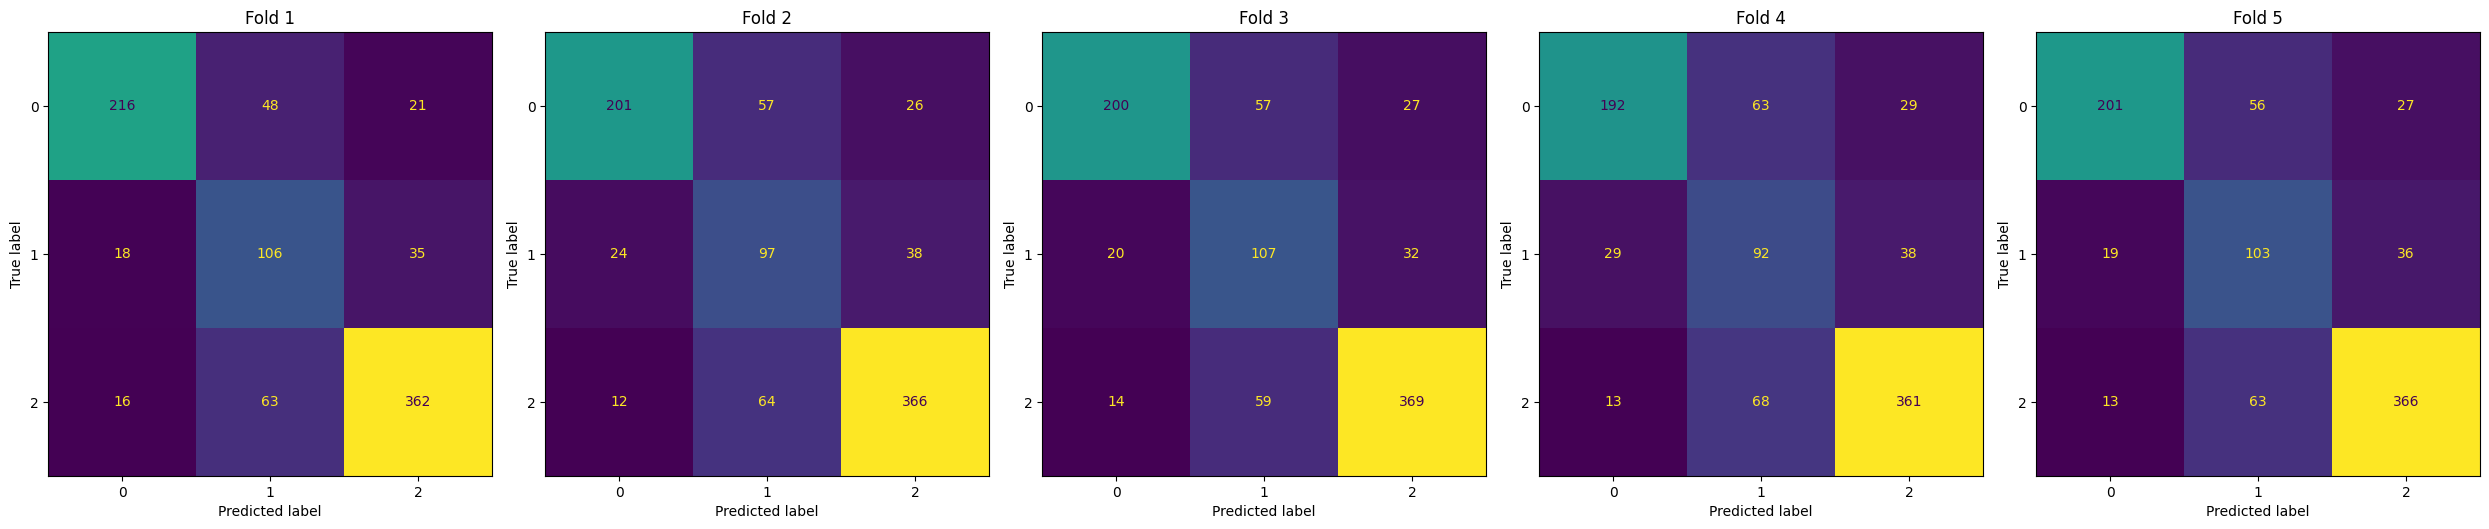

In [149]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, ((train_index, test_index), estimator) in enumerate(
        zip(outer_cv.split(dataset_features, targets_encoded), svc_estimators_final)):

    ConfusionMatrixDisplay.from_estimator(
        estimator,
        dataset_features.iloc[test_index],
        targets_encoded.iloc[test_index],
        ax=axs[i],
        colorbar=False
    )
    axs[i].set_title(f"Fold {i+1}")

plt.tight_layout()
plt.show()

SVC gir også relativt stabile resultater på tvers av folds. Dette er klart den modellen som er best på å predikere den mest sjeldne klassen dropout. Dette er trolig fordi modellen bruker class_weight balanced.

### MLP

In [161]:
mlp_pipe = Pipeline([
            ('enc', encode),
            ('mlp', MLPClassifier(max_iter=2000, random_state=global_random_state))
        ])

In [ ]:
mlp_params = {
    "mlp__hidden_layer_sizes": [(64,), (128,), (64, 32), (128, 64)],
    "mlp__activation": ["relu", "tanh"],
    "mlp__solver": ["adam"],
    "mlp__alpha": [0.0001, 0.001, 0.01],
    "mlp__learning_rate_init": [0.001, 0.01],
    "mlp__batch_size": [64, 128],
}

For MLP har jeg valgt 5 hyperparametere å tune, nemlig de som skal ha størst påvirkning på modellen. Jeg har også forsøkt å starte med å teste verdier bredt.

Hidden_layer_sizes bestemmer selve arkitekturen til det nevrale nettverket. Det bestemmer hvor mange skjulte lag det skal ha, og hvor mange nevroner hvert lag har. Et lavt antall nevroner eller antall lag vil gjøre treningene raske og minske sannsynligheten for overfitting, samtidig så kan det føre til at modellen blir for enkel og presterer dårlig. Et høyere antall nevroner eller antall lag vil kunne fange opp mer komplekse mønstre, men kan samtidig føre til overfitting og vil utvide treningstiden.

Activation er hvordan nevronene transformerer summen av inputs. Relu er som regel best ettersom den blant annet lærer raskt og skal være robust, men kan føre til fler døde nevroner. Tanh gir ofte gode resultater når data ligger rundt 0, slik som når den er skalert, men er ofte tregere og kan være dårlig ettersom mange verdier faktisk er 0 i dette datasettet etter encoding.

Solver er algoritmen som brukes for å justere vekter under treningen. Adam er standard, og skal være en rask og stabil algoritme. Lbfgs er en alternativ algoritme som jeg vurderte å teste, men siden jeg ønsket å begrense antall parametere pga kjøretid så valgte jeg å droppe denne. Denne algoritmen bruker både lenger tid på kjøring, og skal som regel egne seg best på små datasett.

Alpha er verdien som bestemmer hvor mye modellen skal straffer store koeffisienter. En lav alpha vil kunne gjøre at modellen finner mer detaljer i dataen, men kan samtidig føre til overfitting. En høyere alpha vil minke sjansen for overfitting og gjøre modellen mer robust, men kan samtidig føre til at modellen ikke finner nok mønstre i dataen.

Learning_rate_init bestemmer hvor mye modellen modellen justerer seg dersom vektene oppdaterer seg under trening. En lav verdi vil gjøre treningen mer stabil ettersom den er mer presis, men kan samtidig føre til en lang treningstid. En høyere verdi vil gjøre treningen raskere, men kan føre til at resultatene blir ustabile.

Batch_size er hvor mange observasjoner som modellen skal trene på før den oppdaterer vektene. En lav batch_size vil kunne gjøre modellen godt generalisert, men kan føre til at treningene blir mer ustabile. En større batch_size vil kunne gi mer stabile resultater, men kan føre til for dårlig generalisering.

In [159]:
mlp_estimators, mlp_scores, mlp_cv_results = train(
    mlp_pipe, 
    mlp_params,
    dataset_features,
    targets_encoded
    )
mlp_scores = pd.DataFrame(mlp_scores)
mlp_scores.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.750007,0.701933,0.664997,0.654763,0.884542
std,0.020946,0.027740,0.035752,0.052427,0.015225
min,0.731073,0.678972,0.623319,0.592620,0.865897
25%,0.733333,0.681190,0.631320,0.606973,0.874674
50%,0.744633,0.685529,0.676041,0.675233,0.885660
75%,0.759322,0.727253,0.692065,0.684871,0.890972
max,0.781674,0.736723,0.702241,0.714120,0.905508


<Axes: xlabel='param_mlp__batch_size', ylabel='mean_test_roc_auc'>

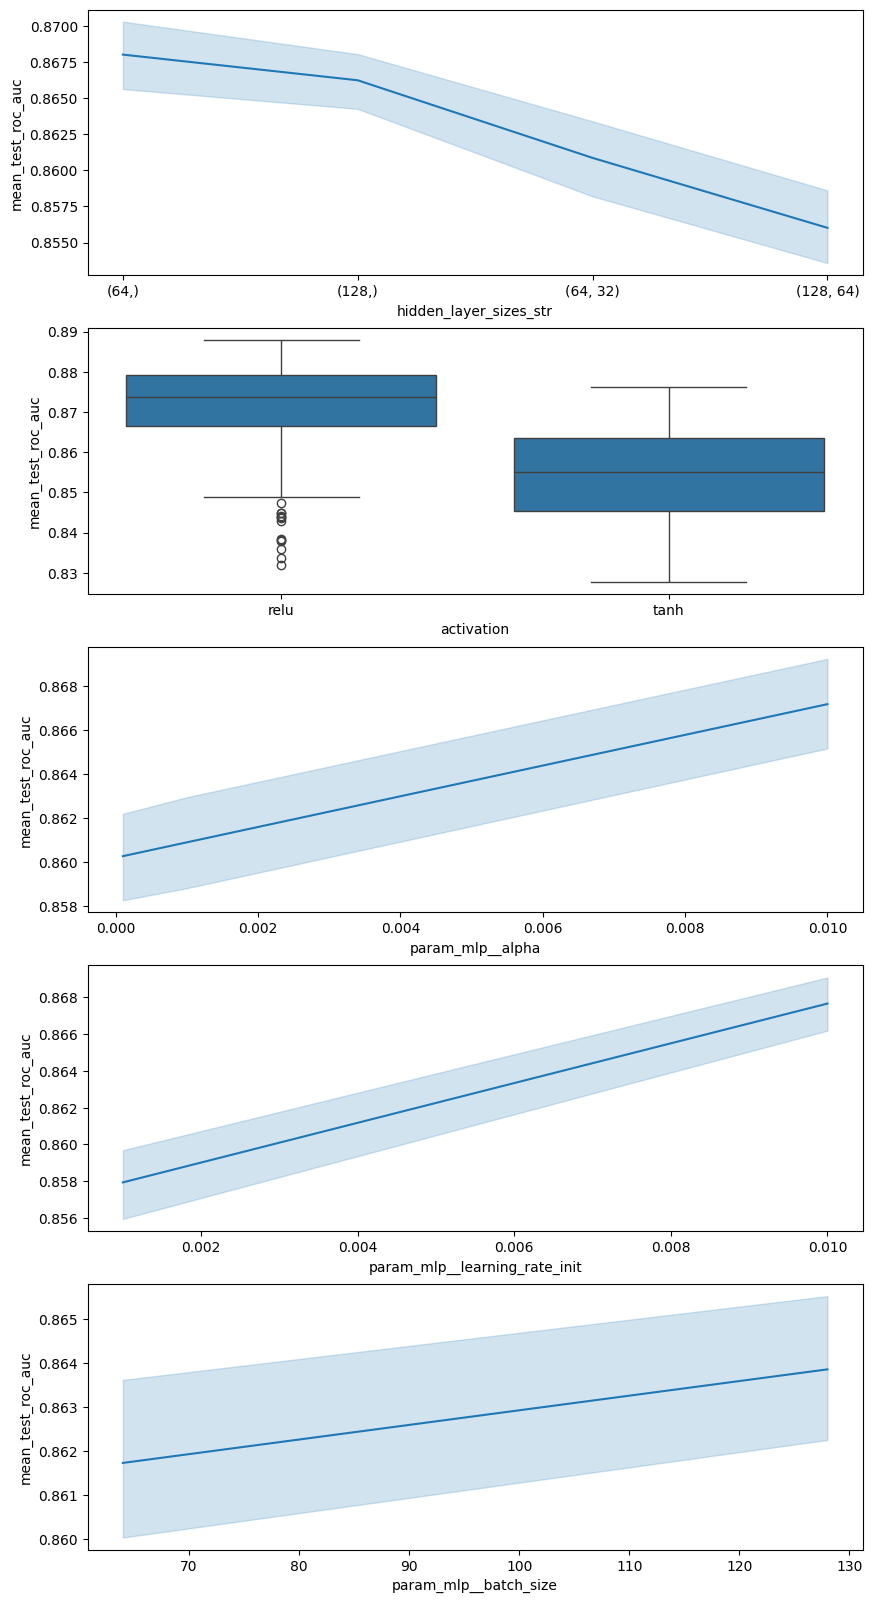

In [160]:
mlp_cv_results_plot = mlp_cv_results.copy()
mlp_cv_results_plot['activation'] = mlp_cv_results_plot['param_mlp__activation'].fillna('None').astype(str)

mlp_cv_results_plot['hidden_layer_sizes_str'] = (mlp_cv_results_plot['param_mlp__hidden_layer_sizes'].astype(str))
fig, ax = plt.subplots(5,1, figsize=(10, 20))
sb.lineplot(data=mlp_cv_results_plot, x='hidden_layer_sizes_str', y='mean_test_roc_auc', ax=ax[0])
sb.boxplot(data=mlp_cv_results_plot, x='activation', y='mean_test_roc_auc', ax=ax[1])
sb.lineplot(data=mlp_cv_results_plot, x='param_mlp__alpha', y='mean_test_roc_auc', ax=ax[2])
sb.lineplot(data=mlp_cv_results_plot, x='param_mlp__learning_rate_init', y='mean_test_roc_auc', ax=ax[3])
sb.lineplot(data=mlp_cv_results_plot, x='param_mlp__batch_size', y='mean_test_roc_auc', ax=ax[4])

Modellen ser ut til å fungere bedre på ett mindre lag. Activation er best med standard Relu. Alpha, learning_rate_init og batch_size ser ut til å være bedre på høyere verdier

### MLP; forbedret parametere

In [162]:
mlp_params2 = {
    "mlp__hidden_layer_sizes": [(32,), (48,), (64,)],
    "mlp__activation": ["relu"],
    "mlp__solver": ["adam"],
    "mlp__alpha": [0.001, 0.005, 0.01, 0.02, 0.03],
    "mlp__learning_rate_init": [0.005, 0.01, 0.02],
    "mlp__batch_size": [64, 128, 192],
}

In [163]:
mlp_estimators2, mlp_scores2, mlp_cv_results2 = train(
    mlp_pipe, 
    mlp_params2,
    dataset_features,
    targets_encoded
    )
mlp_scores2 = pd.DataFrame(mlp_scores2)
mlp_scores2.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.747512,0.720381,0.695295,0.695430,0.885227
std,0.027951,0.029010,0.023542,0.021492,0.012154
min,0.714124,0.686444,0.667410,0.664002,0.872819
25%,0.732203,0.695529,0.676602,0.690546,0.875494
50%,0.742081,0.727743,0.702718,0.692169,0.886172
75%,0.762712,0.735599,0.703293,0.710618,0.888188
max,0.786441,0.756592,0.726454,0.719818,0.903462


<Axes: xlabel='param_mlp__batch_size', ylabel='mean_test_roc_auc'>

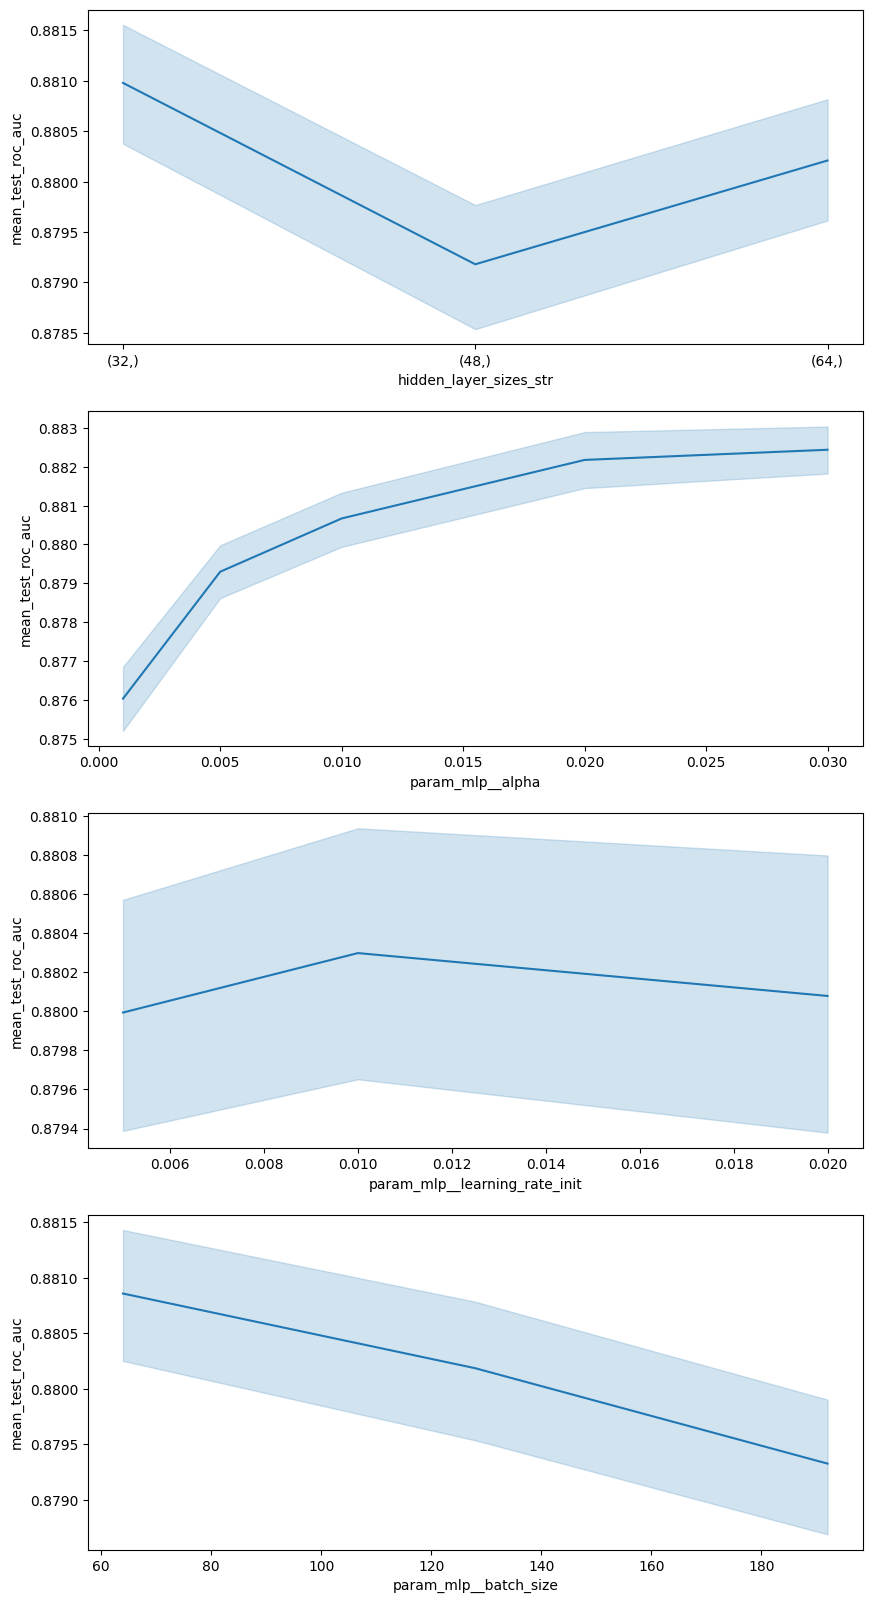

In [172]:
mlp_cv_results_plot2 = mlp_cv_results2.copy()
mlp_cv_results_plot2['hidden_layer_sizes_str'] = (mlp_cv_results_plot2['param_mlp__hidden_layer_sizes'].astype(str))

fig, ax = plt.subplots(4,1, figsize=(10, 20))
sb.lineplot(data=mlp_cv_results_plot2, x='hidden_layer_sizes_str', y='mean_test_roc_auc', ax=ax[0])
sb.lineplot(data=mlp_cv_results_plot2, x='param_mlp__alpha', y='mean_test_roc_auc', ax=ax[1])
sb.lineplot(data=mlp_cv_results_plot2, x='param_mlp__learning_rate_init', y='mean_test_roc_auc', ax=ax[2])
sb.lineplot(data=mlp_cv_results_plot2, x='param_mlp__batch_size', y='mean_test_roc_auc', ax=ax[3])

Modellen ser ut til å være best på det minste laget, alpha ser ut til å være best på en høy verdi, learning_rate rundt 0.01 og en lavere batch_size.

### MLP; forbedret parametere

In [180]:
mlp_params3 = {
    "mlp__hidden_layer_sizes": [(16,), (24,), (32,), (48,)],
    "mlp__activation": ["relu"],
    "mlp__solver": ["adam"],
    "mlp__alpha": [0.02, 0.03, 0.035, 0.04],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01, 0.015],
    "mlp__batch_size": [32, 64, 96, 128, 192],
}

In [181]:
mlp_estimators3, mlp_scores3, mlp_cv_results3 = train(
    mlp_pipe, 
    mlp_params3,
    dataset_features,
    targets_encoded
    )
mlp_scores3 = pd.DataFrame(mlp_scores3)
mlp_scores3.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.771015,0.726337,0.700317,0.704033,0.889649
std,0.016057,0.013016,0.020146,0.017103,0.010958
min,0.743213,0.704668,0.678776,0.683635,0.878298
25%,0.772881,0.723629,0.684987,0.693562,0.883834
50%,0.777401,0.733691,0.695636,0.705984,0.886682
75%,0.777401,0.733888,0.716653,0.707948,0.892434
max,0.784181,0.735809,0.725530,0.729036,0.907000


<Axes: xlabel='param_mlp__batch_size', ylabel='mean_test_roc_auc'>

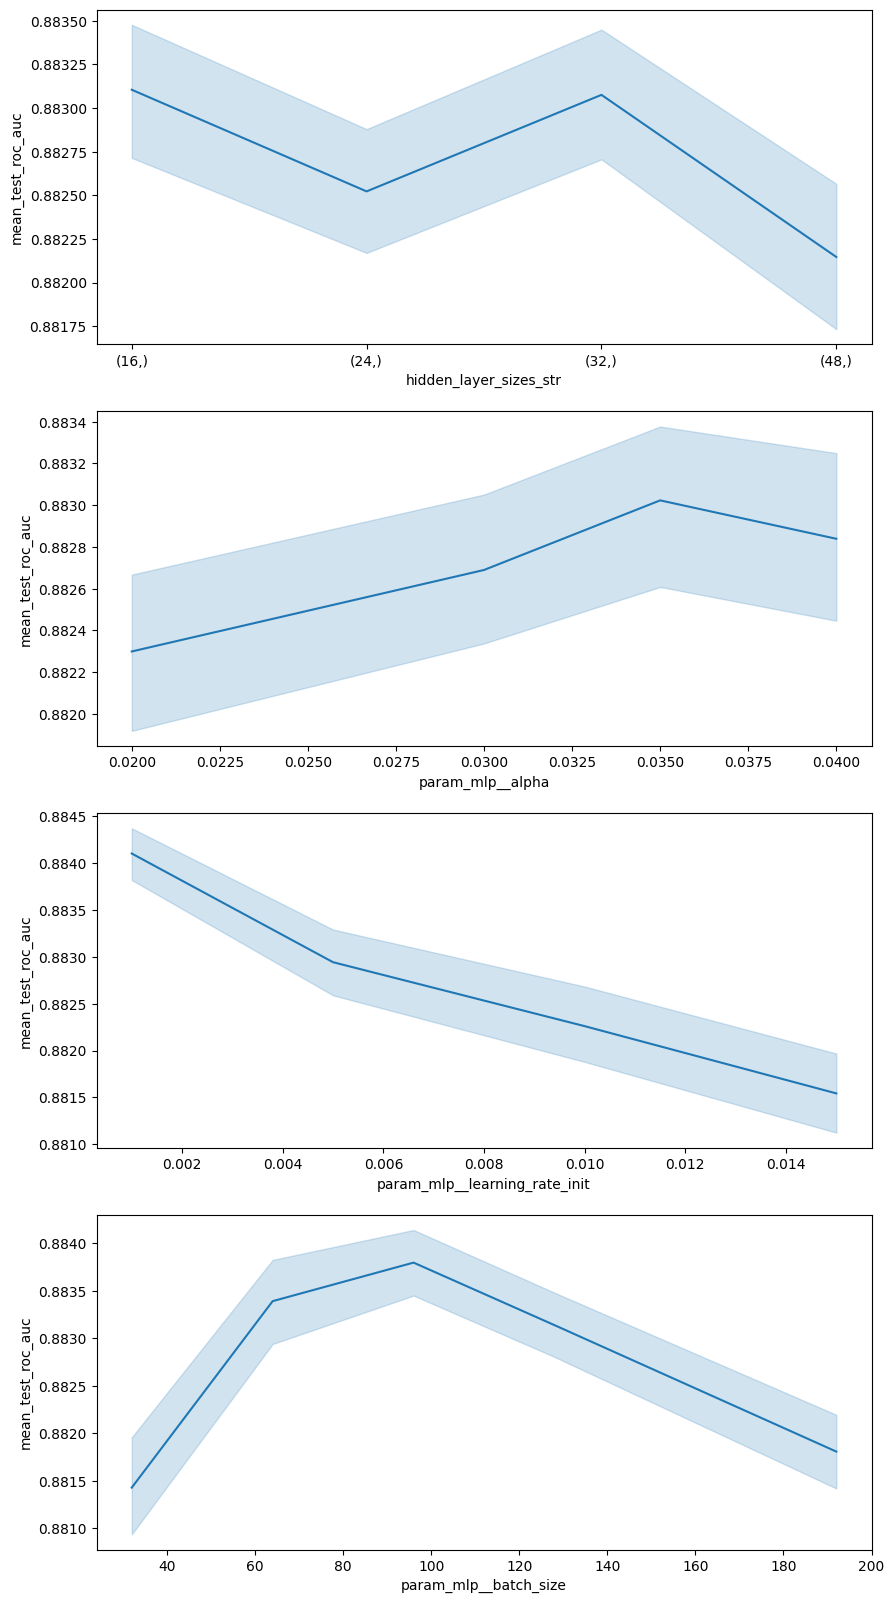

In [182]:
mlp_cv_results_plot3 = mlp_cv_results3.copy()
mlp_cv_results_plot3['hidden_layer_sizes_str'] = (mlp_cv_results_plot3['param_mlp__hidden_layer_sizes'].astype(str))

fig, ax = plt.subplots(4,1, figsize=(10, 20))
sb.lineplot(data=mlp_cv_results_plot3, x='hidden_layer_sizes_str', y='mean_test_roc_auc', ax=ax[0])
sb.lineplot(data=mlp_cv_results_plot3, x='param_mlp__alpha', y='mean_test_roc_auc', ax=ax[1])
sb.lineplot(data=mlp_cv_results_plot3, x='param_mlp__learning_rate_init', y='mean_test_roc_auc', ax=ax[2])
sb.lineplot(data=mlp_cv_results_plot3, x='param_mlp__batch_size', y='mean_test_roc_auc', ax=ax[3])

Grafene viser at jeg har funnet de omtrent beste parameterene. For mange av parameterene så endrer trenden seg basert på de andre, jeg har derfor forsøkt på den siste nå å teste litt ekstra bredt selvom jeg forsøker å følge trendene, slik at jeg kunne finne best mulig kombinasjon.

In [183]:
columns = [
    'param_mlp__hidden_layer_sizes',
    'param_mlp__alpha',
    'param_mlp__learning_rate_init',
    'param_mlp__batch_size',
    'mean_test_roc_auc'
]

mlp_cv_results3_sorted = (
    mlp_cv_results3[columns].groupby(['param_mlp__hidden_layer_sizes', 'param_mlp__alpha', 'param_mlp__learning_rate_init', 'param_mlp__batch_size'],
        as_index=False)['mean_test_roc_auc'].mean().sort_values('mean_test_roc_auc', ascending=False)
)

mlp_cv_results3_sorted.head()

,param_mlp__hidden_layer_sizes,param_mlp__alpha,param_mlp__learning_rate_init,param_mlp__batch_size,mean_test_roc_auc
233,"(32,)",0.040,0.010,128,0.887007
206,"(32,)",0.035,0.005,64,0.886990
40,"(16,)",0.035,0.001,32,0.886608
60,"(16,)",0.040,0.001,32,0.886530
20,"(16,)",0.030,0.001,32,0.886396


De beste resultatene oppnår jeg på ett lag med 32 nevroner, med 0.04 i alpha, 0.01 i learning_rate_init, batch_size på 128 og activation relu. Max_iter som tilsvarer epochs er ikke nødvendig å tune her. For MLPClassifier så stopper modellen tidligere når tapet slutter å forbedre seg, så det er derfor kun viktig å ha en høy nok verdi. 2000 i max_iter har vist seg å være nok i dette tilfellet. 

### MLP; endelige parametere

In [184]:
mlp_params_final = {
    "mlp__hidden_layer_sizes": [(32,)],
    "mlp__activation": ["relu"],
    "mlp__solver": ["adam"],
    "mlp__alpha": [0.04],
    "mlp__learning_rate_init": [0.01],
    "mlp__batch_size": [128],
}

In [185]:
mlp_estimators_final, mlp_scores_final, mlp_cv_results_final = train(
    mlp_pipe, 
    mlp_params_final,
    dataset_features,
    targets_encoded
    )
mlp_scores_final = pd.DataFrame(mlp_scores_final)
mlp_scores_final.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.763110,0.718022,0.675088,0.673724,0.886104
std,0.012714,0.023194,0.045062,0.054385,0.014395
min,0.749153,0.691766,0.617220,0.597384,0.864187
25%,0.757062,0.708865,0.644470,0.640705,0.882820
50%,0.760181,0.709657,0.678535,0.690591,0.888844
75%,0.766102,0.726674,0.707393,0.706731,0.891091
max,0.783051,0.753147,0.727821,0.733211,0.903578


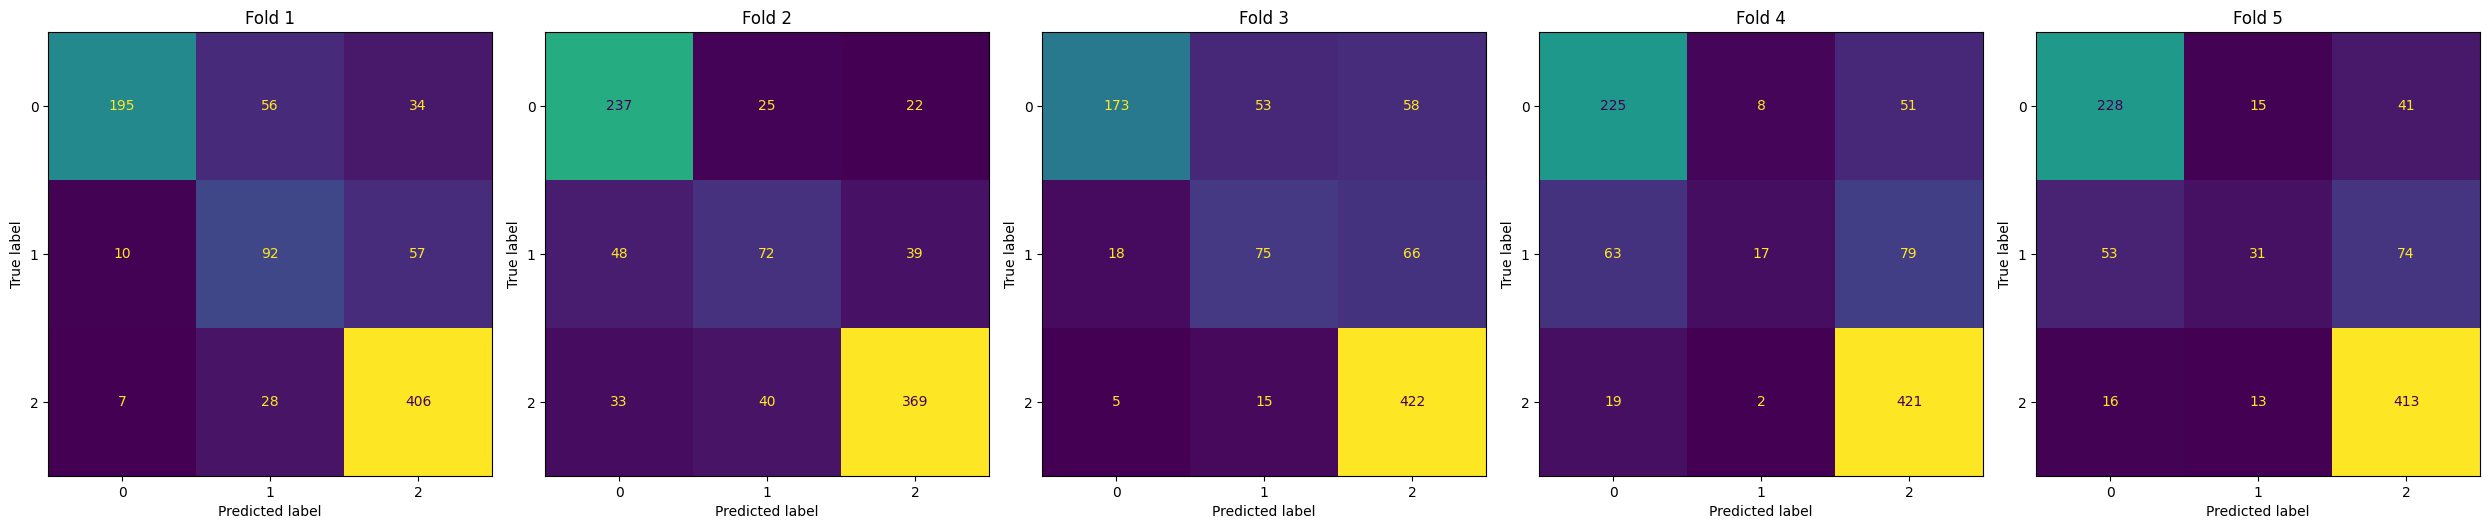

In [186]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, ((train_index, test_index), estimator) in enumerate(
        zip(outer_cv.split(dataset_features, targets_encoded), mlp_estimators_final)):

    ConfusionMatrixDisplay.from_estimator(
        estimator,
        dataset_features.iloc[test_index],
        targets_encoded.iloc[test_index],
        ax=axs[i],
        colorbar=False
    )
    axs[i].set_title(f"Fold {i+1}")

plt.tight_layout()
plt.show()

MLP gir litt mindre stabile resultater på tvers av folds enn de andre modellene. Den kan på enkelte folds være god på å predikere minoritetsklassen, men i andre svært dårlig.

In [238]:
tf_pipe = Pipeline([
        ('log_scaled_encoded', log_scale_encode),     
        ('tf', KerasClassifier(model=build_tensorflow_model, verbose=0, random_state=global_random_state))
    ])
tf_params = {
    "tf__model__hidden_layers": [(64, 32)],
    "tf__model__dropout_rate": [0.0],
    "tf__optimizer__learning_rate": [0.001, 0.003, 0.01],
    "tf__epochs": [15],
    "tf__batch_size": [32, 64, 96, 128],
}

Jeg har her valgt å tune 5 viktige parametere for Tensorflow sine modeller. Ettersom det tar såpass lang tid å kjøre disse modellene så satt jeg antall epochs passe lavt, og tuner denne ved å sammenligne epoch/loss senere. Jeg tuner denne basert på f1 score, ettersom jeg ikke får målt denne modellen med ROC-AUC.

Hidden_layers er hvor mange lag, med hvor mange nevroner i lagene en modell skal ha. En lav verdi vil gi raskere treninger og mindre sjanse for overfitting, men kan samtidig føre til at modellen ikke finner nok mønstre. En høyere verdi kan la modellen lære mer komplekse mønstre, men vil føre til lenger treningstid og kan føre til overfitting.

Dropout_rate er når modellen skrur av noen av nevronene under trening, og den bestemmer hvor mye modellen reguleres. En lav verdi vil la modellen kunne lære raskt, men kan føre til overfitting. En høyere verdi minke sannsynligheten for overfitting, men vil gjøre at modellen lærer saktere og kan eventuelt ikke lære seg nok mønstre.

Optimizer_learning_rate er hvor mye optimizeren skal oppdatere vekter om gangen under trening. En lav verdi vil kunne gi en mer stabil modell, men vil kunen gjøre at modellen sitter fast i lokale minima, altså at den tror den har funnet området med minst loss, men ender opp med å ikke finne det globale minima, altså det området med faktisk minst loss. Det vil også kunne føre til langsom trening. En høyere verdi vil kunne gjøre det enklere for modellen å unngå å sitte fast i lokale minima, samt raskere trening, men vil kunne gjøre treningen ustabil ettersom modellen kan ende opp med å overse gode minima.

Epochs er hvor mange ganger modellen ser datasettet. En lav verdi vil gi rask trening, men kan føre til at modellen ikke lærer seg nok mønstre. En høyere verdi vil kunne la modellen finne mer komplekse mønstre, men vil øke treningstiden og sannsynligheten for overfitting.

Batch_size er antall datapunkter som modellen må bruke før den kan oppdatere vektene. En lav batch_size vil gi mange små oppdateringer som gir bedre generalisering, men kan føre til lenger treningstid og ustabile resultater ved at loss går opp og ned. En høyere verdi vil gi raskere treninger og mer stabil læring for modellen, men kan føre til overfitting dersom den finner for komplekse mønstre på trening.

For å begrense antall hyperparametere og kjøretid så velger jeg å ikke teste flere activation functions for denne. Relu fungerte også best for MLP, så den vil trolig også gjøre det her.

Batch_size og optimizer_learning rate henger sammen, og ettersom disse modellene tar såpass lang tid å tune så velger jeg å tune disse to parameterene sammen før antall lag og dropout_rate. Dette er fordi en mindre batch vil kunne fungere dårlig med for høy learning_rate. 

In [239]:
tf_estimators, tf_scores, tf_cv_results = train(
    tf_pipe, 
    tf_params,
    dataset_features,
    targets_encoded,
    scoring=tensorflow_scoring,
    refit="f1",
    n_jobs=1
    )
tf_scores = pd.DataFrame(tf_scores)
tf_scores.describe()

2025-12-08 16:04:47.566804: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-12-08 16:04:52.864909: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

2025-12-08 16:05:26.870148: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-12-08 16:05:32.419264: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.774867,0.724961,0.696884,0.704233
std,0.013659,0.021910,0.030761,0.031786
min,0.758192,0.692051,0.650014,0.654374
25%,0.766102,0.714883,0.686580,0.697708
50%,0.772881,0.730541,0.699839,0.705691
75%,0.786199,0.742139,0.722686,0.730585
max,0.790960,0.745191,0.725299,0.732806


<Axes: xlabel='param_tf__batch_size', ylabel='mean_test_f1'>

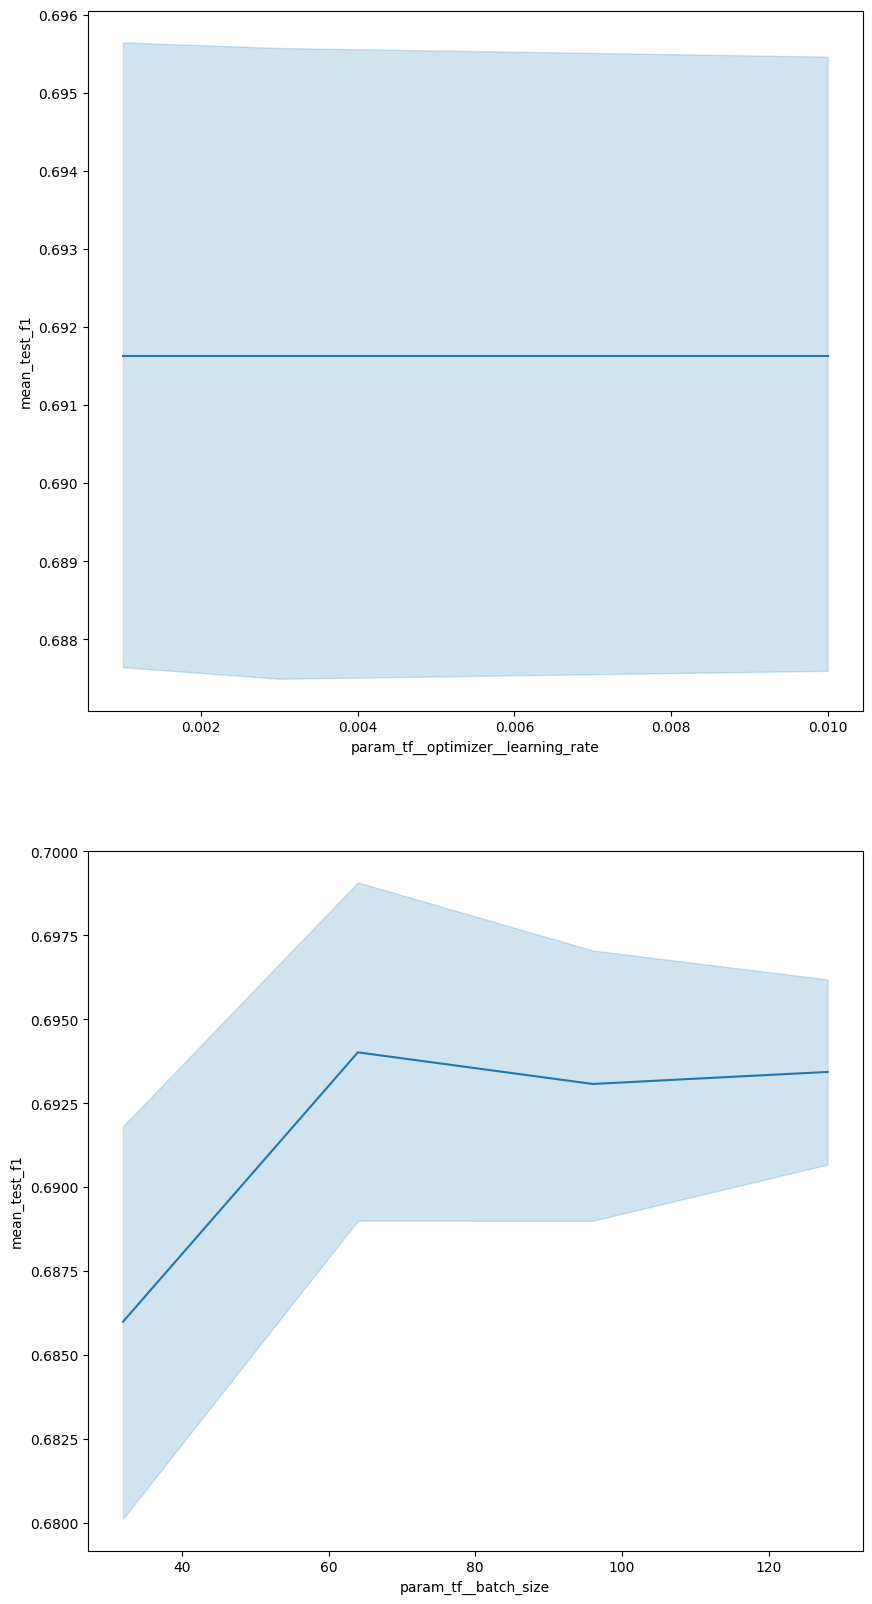

In [240]:
fig, ax = plt.subplots(2,1, figsize=(10, 20))
sb.lineplot(data=tf_cv_results, x='param_tf__optimizer__learning_rate', y='mean_test_f1', ax=ax[0])
sb.lineplot(data=tf_cv_results, x='param_tf__batch_size', y='mean_test_f1', ax=ax[1])

In [242]:
columns = [
    'param_tf__optimizer__learning_rate',
    'param_tf__batch_size',
    'mean_test_f1'
]

tf_cv_results_sorted = (
    tf_cv_results[columns].groupby(['param_tf__optimizer__learning_rate', 'param_tf__batch_size'],
        as_index=False)['mean_test_f1'].mean().sort_values('mean_test_f1', ascending=False)
)

tf_cv_results_sorted.head()

,param_tf__optimizer__learning_rate,param_tf__batch_size,mean_test_f1
1,0.001,64,0.694013
5,0.003,64,0.694013
9,0.010,64,0.694013
3,0.001,128,0.693429
7,0.003,128,0.693429


Modellen presterer best med 64 i batch_size. Learning_rate ser ikke ut til å forandre metrikkene på denne batch_sizen. Jeg velger å bruke den laveste, nemlig 0.001. Denne kan trolig bli enda bedre og minke sannsynligheten for ustabilitet senere ved høyere antall epochs.

In [244]:
tf_params2 = {
    "tf__model__hidden_layers": [(32,), (48,), (64,), (32, 16), (48, 24), (64, 32)],
    "tf__model__dropout_rate": [0.0, 0.1, 0.2],
    "tf__optimizer__learning_rate": [0.001],
    "tf__epochs": [15],
    "tf__batch_size": [64],
}

In [245]:
tf_estimators2, tf_scores2, tf_cv_results2 = train(
    tf_pipe, 
    tf_params2,
    dataset_features,
    targets_encoded,
    scoring=tensorflow_scoring,
    refit="f1",
    n_jobs=1
    )
tf_scores2 = pd.DataFrame(tf_scores2)
tf_scores2.describe()

2025-12-08 16:17:49.524451: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-12-08 16:17:54.623096: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.775090,0.727544,0.693959,0.703039
std,0.015849,0.026438,0.027005,0.030002
min,0.758192,0.692051,0.650014,0.654374
25%,0.766102,0.714883,0.695217,0.705691
50%,0.772624,0.726458,0.699839,0.707871
75%,0.778531,0.743160,0.700694,0.710328
max,0.800000,0.761170,0.724031,0.736930


<Axes: xlabel='param_tf__model__dropout_rate', ylabel='mean_test_f1'>

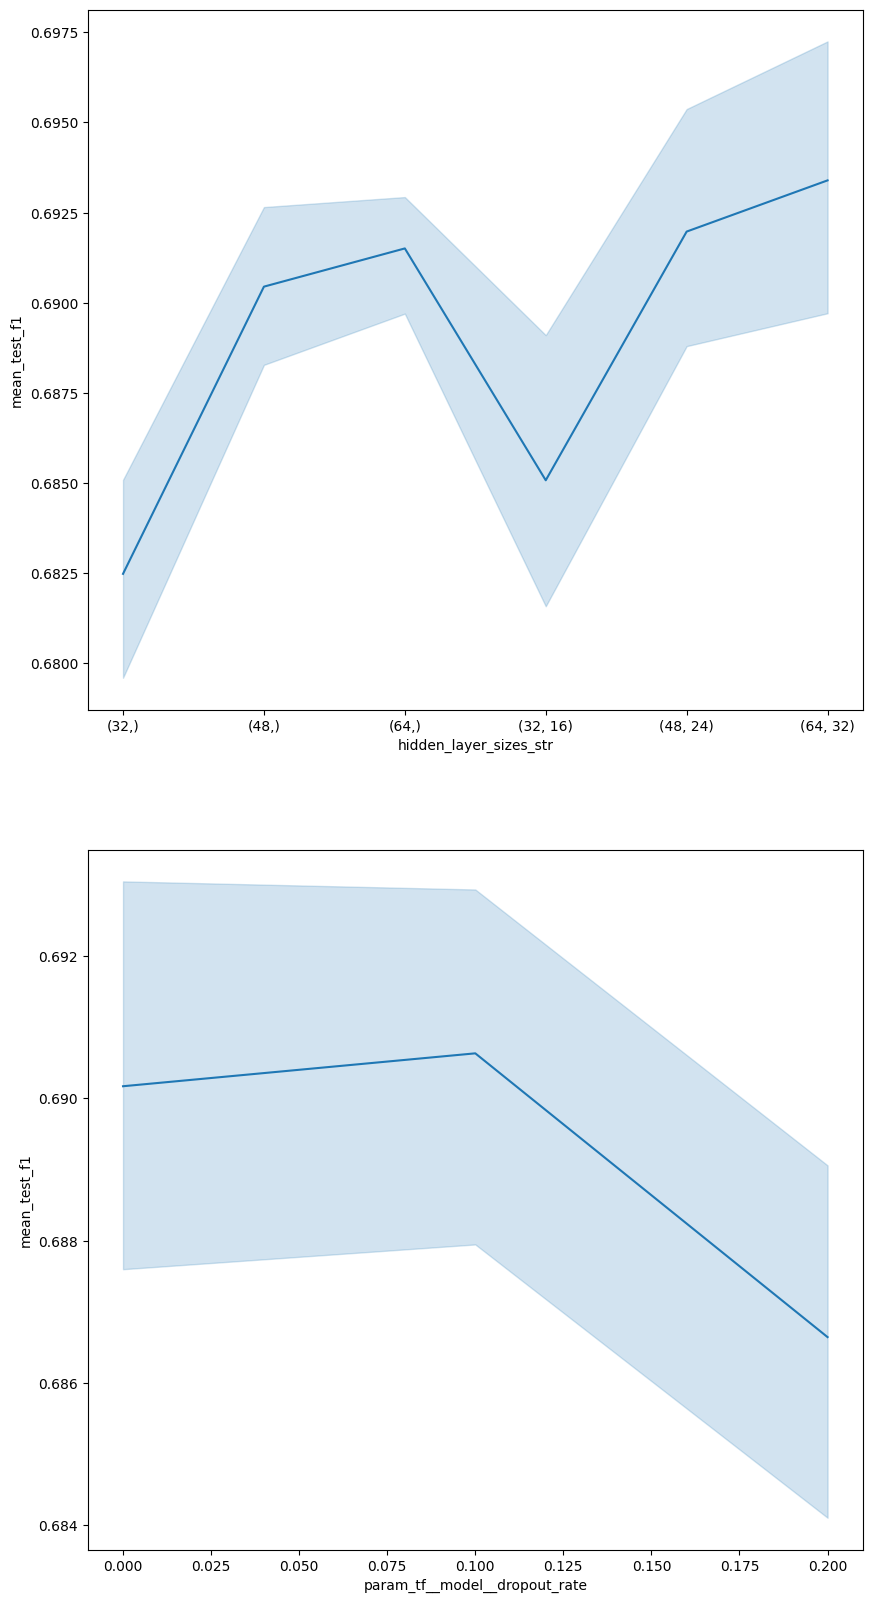

In [247]:
tf_cv_results_plot2 = tf_cv_results2.copy()
tf_cv_results_plot2['hidden_layer_sizes_str'] = (tf_cv_results_plot2['param_tf__model__hidden_layers'].astype(str))

fig, ax = plt.subplots(2,1, figsize=(10, 20))
sb.lineplot(data=tf_cv_results_plot2, x='hidden_layer_sizes_str', y='mean_test_f1', ax=ax[0])
sb.lineplot(data=tf_cv_results_plot2, x='param_tf__model__dropout_rate', y='mean_test_f1', ax=ax[1])

Et høyere antall nevroner i første lag ser ut til å fungere godt, det kan også se ut til at fler lag kan være bedre. Det ser ut til at det kan være hensiktsmessig å ha med dropout_rate, men ikke for høy.

In [248]:
tf_params3 = {
    "tf__model__hidden_layers": [(64,), (64, 32), (64, 32, 16), (96,), (96, 48), (96, 48, 24)],
    "tf__model__dropout_rate": [0.05, 0.1, 0.15],
    "tf__optimizer__learning_rate": [0.001],
    "tf__epochs": [15],
    "tf__batch_size": [64],
}

In [249]:
tf_estimators3, tf_scores3, tf_cv_results3 = train(
    tf_pipe, 
    tf_params3,
    dataset_features,
    targets_encoded,
    scoring=tensorflow_scoring,
    refit="f1",
    n_jobs=1
    )
tf_scores3 = pd.DataFrame(tf_scores3)
tf_scores3.describe()

2025-12-08 16:33:58.971293: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-12-08 16:34:04.001660: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.773734,0.726639,0.699242,0.707810
std,0.017388,0.027368,0.027076,0.028215
min,0.758192,0.695188,0.666121,0.673387
25%,0.766102,0.717976,0.681802,0.692231
50%,0.768362,0.723120,0.700694,0.710328
75%,0.772624,0.726458,0.711082,0.713904
max,0.803390,0.770452,0.736510,0.749200


<Axes: xlabel='param_tf__model__dropout_rate', ylabel='mean_test_f1'>

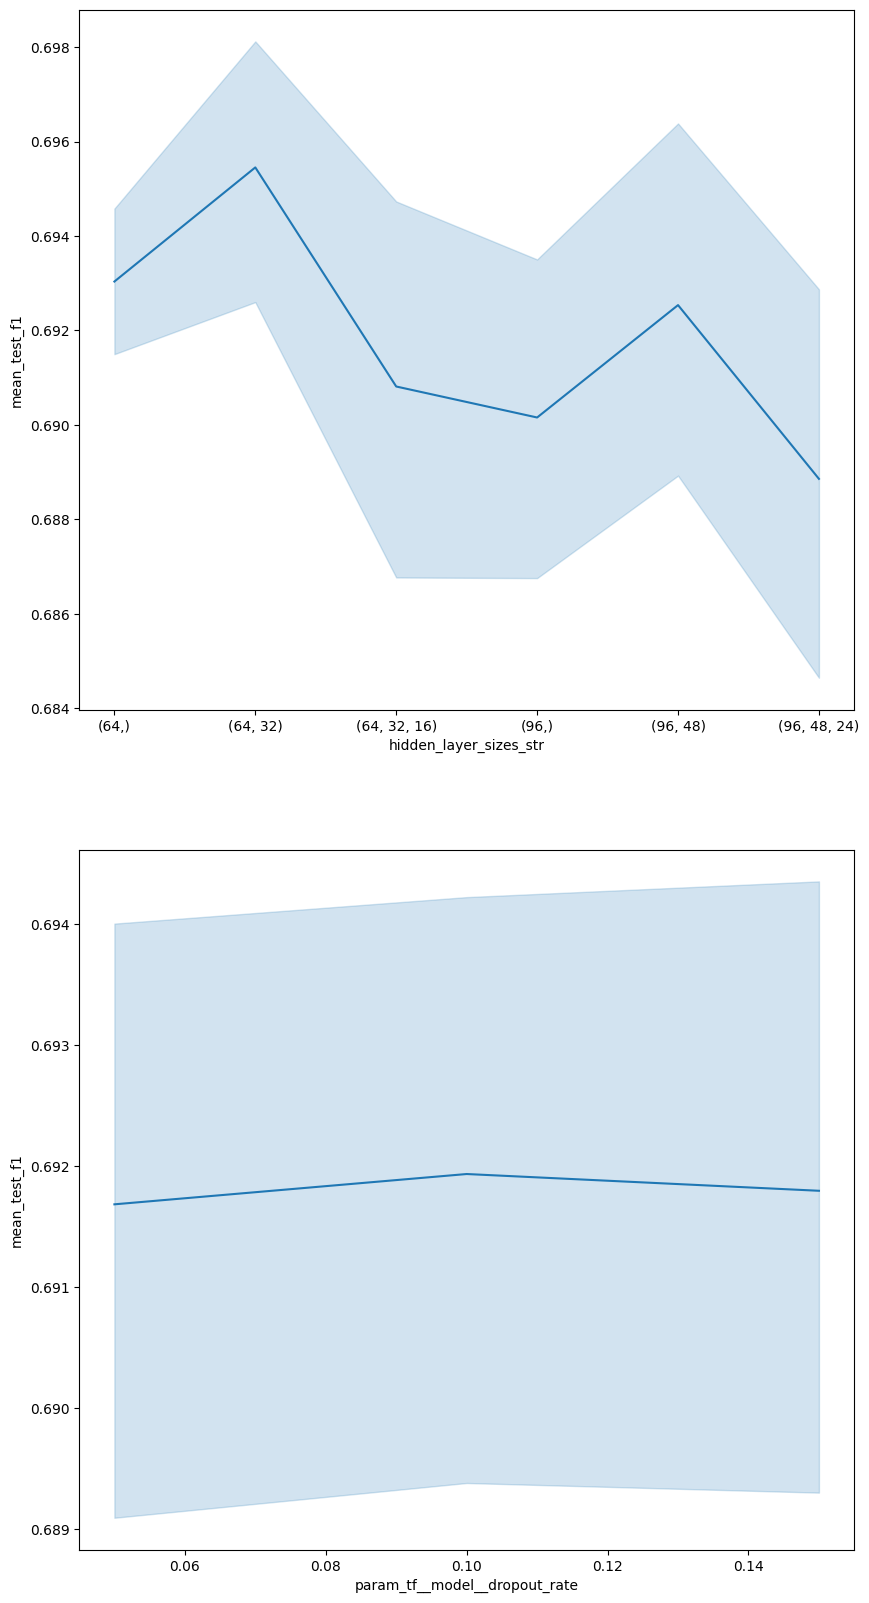

In [250]:
tf_cv_results_plot3 = tf_cv_results3.copy()
tf_cv_results_plot3['hidden_layer_sizes_str'] = (tf_cv_results_plot3['param_tf__model__hidden_layers'].astype(str))

fig, ax = plt.subplots(2,1, figsize=(10, 20))
sb.lineplot(data=tf_cv_results_plot3, x='hidden_layer_sizes_str', y='mean_test_f1', ax=ax[0])
sb.lineplot(data=tf_cv_results_plot3, x='param_tf__model__dropout_rate', y='mean_test_f1', ax=ax[1])

Grafene viser at jeg har funnet de omtrent beste parameterene.

In [251]:
columns = [
    'param_tf__model__hidden_layers',
    'param_tf__model__dropout_rate',
    'mean_test_f1'
]

tf_cv_results_sorted3 = (
    tf_cv_results3[columns].groupby(['param_tf__model__hidden_layers', 'param_tf__model__dropout_rate'],
        as_index=False)['mean_test_f1'].mean().sort_values('mean_test_f1', ascending=False)
)

tf_cv_results_sorted3.head()

,param_tf__model__hidden_layers,param_tf__model__dropout_rate,mean_test_f1
4,"(64, 32)",0.10,0.695740
3,"(64, 32)",0.05,0.695635
14,"(96, 48)",0.15,0.695281
5,"(64, 32)",0.15,0.694981
6,"(64, 32, 16)",0.05,0.694870


Modellen fungerer i snitt best med to skjulte lag, ett med 64 og ett med 32 nevroner. Dropout_rate er optimalt når det er satt til 0.1

In [257]:
tf_params4 = {
    "tf__model__hidden_layers": [(64, 32)],
    "tf__model__dropout_rate": [0.1],
    "tf__optimizer__learning_rate": [0.001],
    "tf__epochs": [50],
    "tf__batch_size": [64]
}

In [258]:
tf_estimators4, tf_scores4, tf_cv_results4 = train(
    tf_pipe, 
    tf_params4,
    dataset_features,
    targets_encoded,
    scoring=tensorflow_scoring,
    refit="f1",
    n_jobs=1
    )
tf_scores4 = pd.DataFrame(tf_scores4)
tf_scores4.describe()

2025-12-08 16:56:43.743002: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-12-08 16:56:50.253190: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.746385,0.690990,0.680306,0.683831
std,0.025656,0.038677,0.037727,0.037581
min,0.715254,0.639198,0.630584,0.633492
25%,0.726554,0.666312,0.663378,0.664695
50%,0.753394,0.700909,0.683153,0.691268
75%,0.757062,0.710494,0.691101,0.695241
max,0.779661,0.738037,0.733315,0.734462


Ettersom det ikke var mulig å hente ut validerings-loss med train-funksjonen fra indre folds, valgte jeg å trene en separat modell med 20% til valideringsdata. Her vil jeg se etter hvor validerings-loss begynner å stige.

Epoch 1/50


2025-12-08 18:30:02.830005: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6151 - loss: 0.8896 - val_accuracy: 0.6814 - val_loss: 0.7484
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.7107 - loss: 0.7017 - val_accuracy: 0.7198 - val_loss: 0.6693
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.7505 - loss: 0.6208 - val_accuracy: 0.7390 - val_loss: 0.6283
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.7683 - loss: 0.5816 - val_accuracy: 0.7537 - val_loss: 0.6089
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.7748 - loss: 0.5572 - val_accuracy: 0.7446 - val_loss: 0.5977
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.7926 - loss: 0.5300 - val_accuracy: 0.7412 - val_loss: 0.5908
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.8039 - loss: 0.4995 - val_accuracy: 0.7379 - val_loss: 0.5919
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.8169 - loss: 0.4872 - val_accuracy: 0.7367 - val_lo

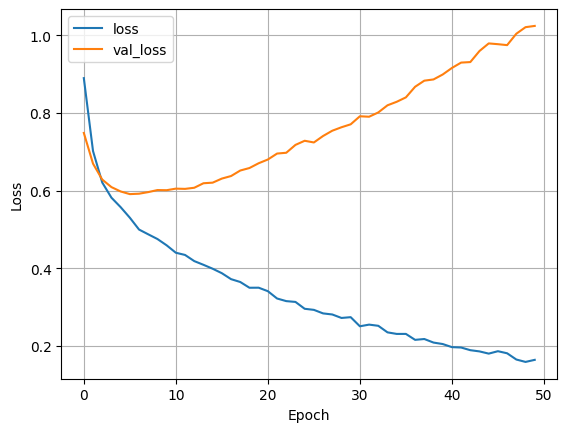

In [273]:
tf_pipe_epochs_loss = Pipeline([
        ('log_scaled_encoded', log_scale_encode),     
        ('tf', KerasClassifier(
            model=build_tensorflow_model, 
            model__hidden_layers=(64,32), 
            model__dropout_rate=0.1, 
            optimizer__learning_rate=0.001, 
            epochs=50, 
            batch_size=64, 
            validation_split=0.2, 
            verbose=1,
            random_state=global_random_state
        ))
    ])

tf_pipe_epochs_loss.fit(dataset_features, dataset_targets)

tf_clf = tf_pipe_epochs_loss.named_steps["tf"]
history = tf_clf.history_

plt.plot(history["loss"], label="loss")
plt.plot(history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Trenings-loss synker jevnt helt frem til 50 epochs, mens validerings-loss synker frem til 6 epochs, og begynner så å stige. Dette tyder på at modellen overfitter ved bruk av fler enn 6 epochs. Altså at et høyere antall epochs vil kun forbedre ytelsen på treningsdataen, noe som ikke er ønskelig.

In [270]:
tf_params_final = {
    "tf__model__hidden_layers": [(64, 32)],
    "tf__model__dropout_rate": [0.1],
    "tf__optimizer__learning_rate": [0.001],
    "tf__epochs": [6],
    "tf__batch_size": [64]
}

In [271]:
tf_estimators_final, tf_scores_final, tf_cv_results_final = train(
    tf_pipe, 
    tf_params_final,
    dataset_features,
    targets_encoded,
    scoring=tensorflow_scoring,
    refit="f1",
    n_jobs=1
    )
tf_scores_final = pd.DataFrame(tf_scores_final)
tf_scores_final.describe()

2025-12-08 18:22:04.804918: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-12-08 18:22:09.970966: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.769890,0.722190,0.681544,0.692494
std,0.011875,0.017826,0.016981,0.018737
min,0.759322,0.705989,0.670058,0.680188
25%,0.763575,0.715181,0.670902,0.680285
50%,0.766102,0.715944,0.671197,0.681615
75%,0.770621,0.721321,0.686078,0.696792
max,0.789831,0.752516,0.709483,0.723589


2025-12-08 18:37:50.864599: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


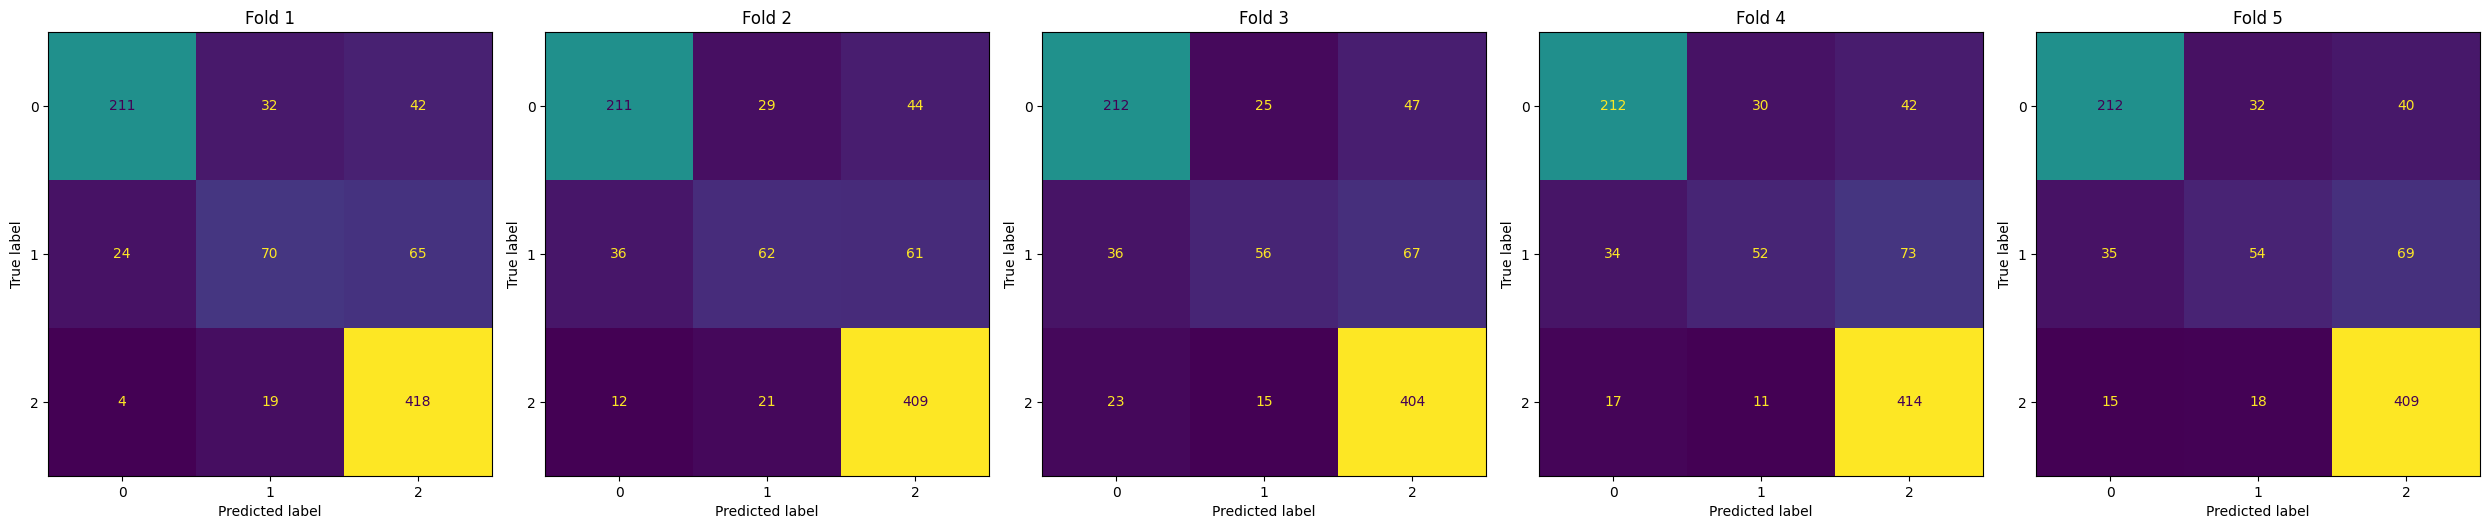

In [275]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, ((train_index, test_index), estimator) in enumerate(
        zip(outer_cv.split(dataset_features, targets_encoded), tf_estimators_final)):

    test_features = dataset_features.iloc[test_index]
    test_targets = targets_encoded.iloc[test_index]

    predictions = estimator.predict(test_features)

    ConfusionMatrixDisplay.from_predictions(
        test_targets,
        predictions,
        ax=axs[i],
        colorbar=False
    )
    axs[i].set_title(f"Fold {i+1}")

plt.tight_layout()
plt.show()

KerasClassifier gir relativt stabile resultater på tvers av folds. Slik som de fleste andre modeller, er den dårlig på å predikere den sjeldne klassen Dropout.

## Sammenligning av modeller

In [277]:
training_results = pd.DataFrame({
    'Metric' : ['Accuracy', 'Precision', 'Recall', "F1", "ROC-AUC"],
    'HGB' : [hgb_scores_final['accuracy'].mean(), hgb_scores_final['precision'].mean(), hgb_scores_final['recall'].mean(), hgb_scores_final['f1'].mean(), hgb_scores_final['roc_auc'].mean()],
    'MNB' : [mnb_scores_final['accuracy'].mean(), mnb_scores_final['precision'].mean(), mnb_scores_final['recall'].mean(), mnb_scores_final['f1'].mean(), mnb_scores_final['roc_auc'].mean()],
    'CNB' : [cnb_scores_final['accuracy'].mean(), cnb_scores_final['precision'].mean(), cnb_scores_final['recall'].mean(), cnb_scores_final['f1'].mean(), cnb_scores_final['roc_auc'].mean()],
    'SVC' : [svc_scores_final['accuracy'].mean(), svc_scores_final['precision'].mean(), svc_scores_final['recall'].mean(), svc_scores_final['f1'].mean(), svc_scores_final['roc_auc'].mean()],
    'MLP' : [mlp_scores_final['accuracy'].mean(), mlp_scores_final['precision'].mean(), mlp_scores_final['recall'].mean(), mlp_scores_final['f1'].mean(), mlp_scores_final['roc_auc'].mean()],
    'TF' : [tf_scores_final['accuracy'].mean(), tf_scores_final['precision'].mean(), tf_scores_final['recall'].mean(), tf_scores_final['f1'].mean(), "None"]
})
training_results.set_index('Metric', inplace=True)
training_results

,HGB,MNB,CNB,SVC,MLP,TF
Metric,,,,,,
Accuracy,0.781196,0.696653,0.692808,0.754748,0.763110,0.76989
Precision,0.737980,0.653182,0.659183,0.721046,0.718022,0.72219
Recall,0.701449,0.634789,0.558957,0.724162,0.675088,0.681544
F1,0.712740,0.638541,0.529858,0.715561,0.673724,0.692494
ROC-AUC,0.896659,0.815616,0.815580,0.894293,0.886104,None


Basert på ROC-AUC så presterer HistGradientBoosting såvidt best foran SVC og MLP. Basert på F1 så presterer SVC såvidt bedre enn HistGradientBoosting og KerasClassifier sin tensorflow-modell. 

In [ ]:
def evaluate_curves(estimators, X, y, n_splits=5):
    outer_cv = StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=global_random_state)

    pr_frames = []
    nt_frames = []
    roc_frames = []
    for estimator, (train_index, test_index) in zip(estimators,outer_cv.split(X,y)):
        train_pr_results = {}
        test_pr_results = {}
        train_nt_results = {}
        test_nt_results = {}
        train_roc_results = {}
        test_roc_results = {}

        if hasattr(estimator, 'predict_proba'):
            predictions = np.array(estimator.predict_proba(X))[:,1]
            predictions_negative = np.array(estimator.predict_proba(X))[:,0]
        elif hasattr(estimator, 'decision_function'):
            predictions = np.array(estimator.decision_function(X))
            predictions_negative = np.array(estimator.decision_function(X))*-1.0
        else:
            raise ValueError('estimator can\'t be used for curves')

        train_predictions = predictions[train_index]
        train_predictions_negative = predictions_negative[train_index]
        test_predictions = predictions[test_index]
        test_predictions_negative = predictions_negative[test_index]

        train_precision, train_recall, train_thresholds = precision_recall_curve(y.iloc[train_index], train_predictions)
        test_precision, test_recall, test_thresholds = precision_recall_curve(y.iloc[test_index], test_predictions)
        train_npv, train_tnr, train_thresholds2 = precision_recall_curve(y.iloc[train_index], train_predictions_negative, pos_label=0)
        test_npv, test_tnr, test_thresholds2 = precision_recall_curve(y.iloc[test_index],test_predictions_negative, pos_label=0)
        train_fpr, train_tpr, train_thresholds3 = roc_curve(y.iloc[train_index], train_predictions)
        test_fpr, test_tpr, test_thresholds3 = roc_curve(y.iloc[test_index], test_predictions)

        train_pr_results['thresholds'] = np.append(train_thresholds, [1.])
        train_pr_results['precision'] = train_precision
        train_pr_results['recall'] = train_recall
        train_nt_results['thresholds'] = np.append(train_thresholds2, [1.])
        train_nt_results['npv'] = train_npv
        train_nt_results['tnr'] = train_tnr
        train_roc_results['thresholds'] = train_thresholds3
        train_roc_results['fpr'] = train_fpr
        train_roc_results['tpr'] = train_tpr

        test_pr_results['thresholds'] = np.append(test_thresholds, [1.])
        test_pr_results['precision'] = test_precision
        test_pr_results['recall'] = test_recall
        test_nt_results['thresholds'] = np.append(test_thresholds2, [1.])
        test_nt_results['npv'] = test_npv
        test_nt_results['tnr'] = test_tnr
        test_roc_results['thresholds'] = test_thresholds3
        test_roc_results['fpr'] = test_fpr
        test_roc_results['tpr'] = test_tpr

        pr_frames.append(pd.concat([pd.DataFrame(train_pr_results), pd.DataFrame(test_pr_results)], keys=['train', 'test'], names=['stage']))
        nt_frames.append(pd.concat([pd.DataFrame(train_nt_results), pd.DataFrame(test_nt_results)], keys=['train', 'test'], names=['stage']))
        roc_frames.append(pd.concat([pd.DataFrame(train_roc_results), pd.DataFrame(test_roc_results)], keys=['train', 'test'], names=['stage']))
        
    return pd.concat(pr_frames, keys=range(n_splits), names=['test_split']), pd.concat(nt_frames, keys=range(n_splits), names=['test_split']), pd.concat(roc_frames, keys=range(n_splits), names=['test_split'])

In [280]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd

def evaluate_curves_ovr(estimators, X, y, class_of_interest=0, n_splits=5):
    """
    Beregner presisjon–rekall, negativ prediktiv verdi–TNR og ROC‑kurver for én klasse mot resten.
    
    Parameters:
        estimators: iterable av ferdigtrente klassifikatorer (én per fold)
        X: features (pandas DataFrame eller array)
        y: label‑koder (0, 1, 2)
        class_of_interest: klassen som skal betraktes som positiv
        n_splits: antall CV‑folds (må samsvare med antall estimators)
    Returns:
        pr_df, nt_df, roc_df: DataFrames med kurvepunkter for hver fold
    """
    outer_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=global_random_state)

    # binariserer y: 1 for klassen vi analyserer, 0 for alle andre
    y_binary = (y == class_of_interest).astype(int)

    pr_frames = []
    nt_frames = []
    roc_frames = []

    for estimator, (train_idx, test_idx) in zip(estimators, outer_cv.split(X, y)):
        train_pr_results, test_pr_results = {}, {}
        train_nt_results, test_nt_results = {}, {}
        train_roc_results, test_roc_results = {}, {}

        # hent scores for den valgte klassen
        if hasattr(estimator, "predict_proba"):
            # pred_prob[:, class_id] gir sannsynligheten for klassen, jfr. sklearn‑dokumentasjonen [oai_citation:4‡scikit-learn.org](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py%23:~:text=label_binarizer%2520%253D%2520LabelBinarizer%2528%2529,%2528n_samples%252C%2520n_classes).
            scores = estimator.predict_proba(X)[:, class_of_interest]
        elif hasattr(estimator, "decision_function"):
            dec = estimator.decision_function(X)
            # decision_function gir en vektor (binary) eller matrise (multiclass).
            if dec.ndim == 1:
                scores = dec
            else:
                scores = dec[:, class_of_interest]
        else:
            raise ValueError("Estimator støtter verken predict_proba eller decision_function")

        # negative scores som komplement (for NPV/TNR)
        scores_neg = 1.0 - scores

        # split i train og test
        train_y, test_y = y_binary.iloc[train_idx], y_binary.iloc[test_idx]
        train_scores, test_scores = scores[train_idx], scores[test_idx]
        train_scores_neg, test_scores_neg = scores_neg[train_idx], scores_neg[test_idx]

        # presisjon–rekall (positiv klasse)
        train_precision, train_recall, train_thresh = precision_recall_curve(train_y, train_scores)
        test_precision, test_recall, test_thresh = precision_recall_curve(test_y, test_scores)

        # negativ prediktiv verdi og true negative rate (negativ klasse)
        train_npv, train_tnr, train_thresh2 = precision_recall_curve(train_y, train_scores_neg, pos_label=0)
        test_npv, test_tnr, test_thresh2 = precision_recall_curve(test_y, test_scores_neg, pos_label=0)

        # ROC‑kurver
        train_fpr, train_tpr, train_thresh3 = roc_curve(train_y, train_scores, pos_label=1)
        test_fpr, test_tpr, test_thresh3 = roc_curve(test_y, test_scores, pos_label=1)

        # lag DataFrames med stage=(train/test)
        train_pr_results["thresholds"] = np.append(train_thresh, [1.0])
        train_pr_results["precision"] = train_precision
        train_pr_results["recall"] = train_recall
        test_pr_results["thresholds"] = np.append(test_thresh, [1.0])
        test_pr_results["precision"] = test_precision
        test_pr_results["recall"] = test_recall

        train_nt_results["thresholds"] = np.append(train_thresh2, [1.0])
        train_nt_results["npv"] = train_npv
        train_nt_results["tnr"] = train_tnr
        test_nt_results["thresholds"] = np.append(test_thresh2, [1.0])
        test_nt_results["npv"] = test_npv
        test_nt_results["tnr"] = test_tnr

        train_roc_results["thresholds"] = train_thresh3
        train_roc_results["fpr"] = train_fpr
        train_roc_results["tpr"] = train_tpr
        test_roc_results["thresholds"] = test_thresh3
        test_roc_results["fpr"] = test_fpr
        test_roc_results["tpr"] = test_tpr

        pr_frames.append(pd.concat([pd.DataFrame(train_pr_results),
                                    pd.DataFrame(test_pr_results)],
                                   keys=["train", "test"], names=["stage"]))
        nt_frames.append(pd.concat([pd.DataFrame(train_nt_results),
                                    pd.DataFrame(test_nt_results)],
                                   keys=["train", "test"], names=["stage"]))
        roc_frames.append(pd.concat([pd.DataFrame(train_roc_results),
                                     pd.DataFrame(test_roc_results)],
                                    keys=["train", "test"], names=["stage"]))

    return (
        pd.concat(pr_frames, keys=range(n_splits), names=["test_split"]),
        pd.concat(nt_frames, keys=range(n_splits), names=["test_split"]),
        pd.concat(roc_frames, keys=range(n_splits), names=["test_split"]),
    )

In [ ]:
pr_df, nt_df, roc_df = evaluate_curves_ovr(
    estimators=hgb_estimators_final,  
    X=dataset_features,
    y=targets_encoded,
    class_of_interest=0,         
    n_splits=5
)

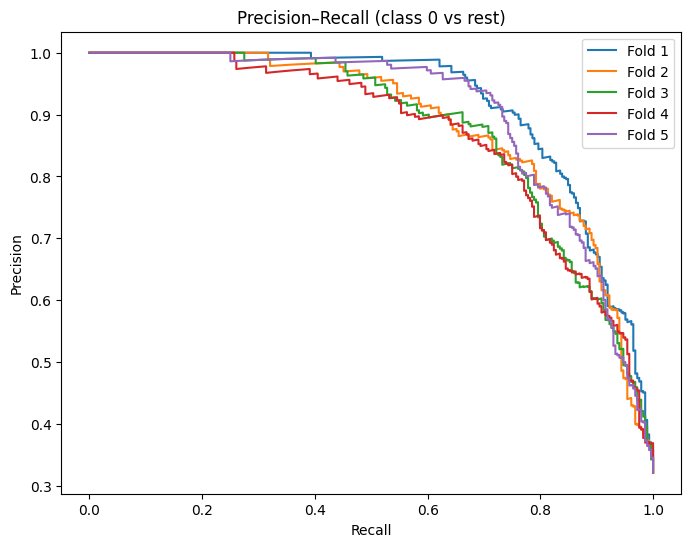

In [ ]:
plt.figure(figsize=(8,6))

for fold in range(5):
    fold_data = pr_df.loc[(fold, 'test')]
    plt.plot(fold_data['recall'], fold_data['precision'], label=f"Fold {fold+1}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall (class 0 vs rest)")
plt.legend()
plt.show()

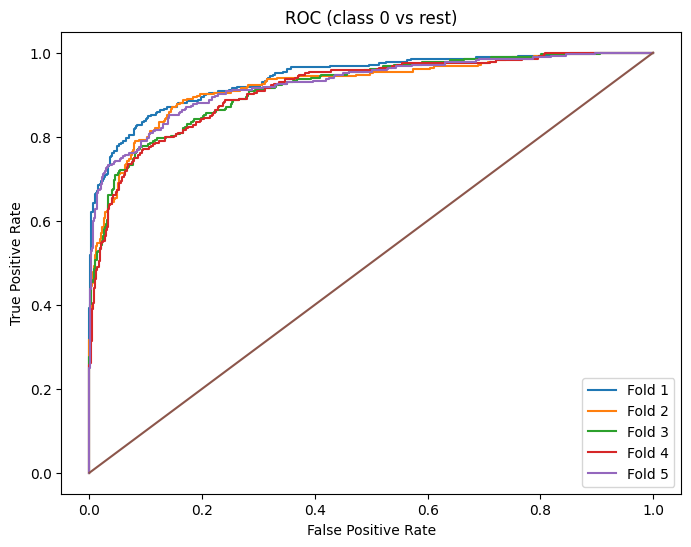

In [299]:
plt.figure(figsize=(8, 6))

for fold in range(5):
    fold_data = roc_df.loc[(fold, "test")]
    plt.plot(fold_data["fpr"], fold_data["tpr"], label=f"Fold {fold+1}")

plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (class 0 vs rest)")
plt.legend()
plt.show()

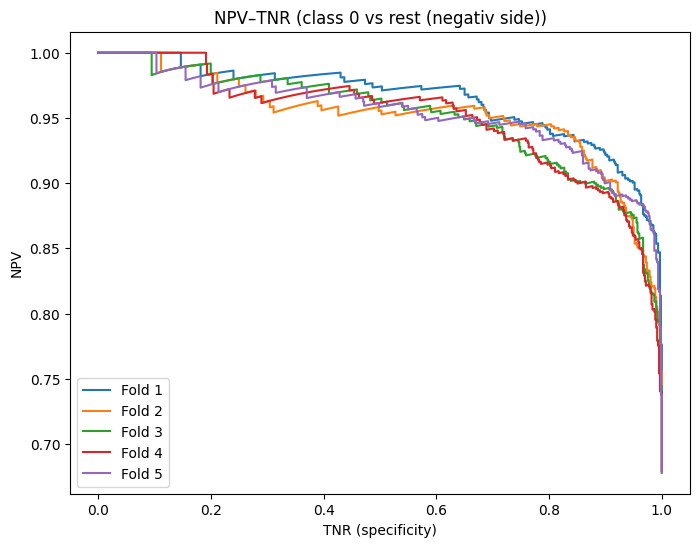

In [293]:
plt.figure(figsize=(8, 6))

for fold in range(5):
    fold_data = nt_df.loc[(fold, "test")]
    plt.plot(fold_data["tnr"], fold_data["npv"], label=f"Fold {fold+1}")

plt.xlabel("TNR (specificity)")
plt.ylabel("NPV")
plt.title("NPV–TNR (class 0 vs rest (negativ side))")
plt.legend()
plt.show()

In [297]:
results = []
precision_target = 1.0

for fold in range(5):
    fold_data = pr_df.loc[(fold, "train")].copy()

    mask = fold_data["precision"] >= precision_target
    candidates = fold_data[mask]

    if not candidates.empty:
        best_idx = candidates["recall"].idxmax()
        best_row = candidates.loc[best_idx]

        results.append({
            "fold": fold,
            "best_threshold": best_row["thresholds"],
            "precision": best_row["precision"],
            "recall": best_row["recall"]
        })
    else:
        best_idx = (
            fold_data
            .sort_values(["precision", "recall"], ascending=[False, False])
            .index[0]
        )
        best_row = fold_data.loc[best_idx]

        results.append({
            "fold": fold,
            "best_threshold": best_row["thresholds"],
            "precision": best_row["precision"],
            "recall": best_row["recall"],
        })

best_thresholds_df = pd.DataFrame(results)
print(best_thresholds_df)

   fold  best_threshold  precision    recall
0     0        0.925935        1.0  0.411092
1     1        0.912115        1.0  0.483729
2     2        0.912973        1.0  0.474934
3     3        0.892392        1.0  0.535620
4     4        0.899716        1.0  0.481970


In [298]:
global_threshold = best_thresholds_df["best_threshold"].median()
print("Global threshold basert på perfekt precision + maks recall:", global_threshold)

Global threshold basert på perfekt precision + maks recall: 0.9121148589015537


**Gradient Boosting Classifier**
- Prosessering:
    - Ingen skalering
    - Ingen log
    - Ingen encoding
- Parametere:
    - learning_rate = 0.04
    - max_leaf_nodes = 15
    - min_samples_leaf = 25
    - l2_regularization = 0.03

**Multinominal Naive Bayes**
- Prosessering: 
    - Ingen skalering
    - Ingen log
    - Med encoding
- Parametere:
    - alpha = 0.5
    - fit_prior = True

**Complement Naive Bayes**
- Prosessering:
    - Ingen skalering
    - Ingen log
    - Med encoding
- Parametere:
    - alpha = 2.5

**Support Vector Classifier (SVC)**
- Prosessering:
    - Med skalering
    - Ingen log
    - Med encoding
- Parametere:
    - c = 10
    - gamma = 0.005
    - class_weight = Balanced

**Multilayer Perception Classifier (MLP)**
- Prosessering:
    - Ingen skalering
    - Ingen log
    - Med encoding
- Parametere:
    - hidden_layer_sizes = (32,)
    - activation = relu
    - alpha = 0.04
    - learning_rate_init = 0.01
    - batch_size = 128

**Keras CLassifier med Tensorflow**
- Prosessering:
    - Med skalering
    - Med log
    - Med encoding
- Parametere:
    - hidden_layer_sizes = (64,32)
    - dropout_rate = 0.1
    - optimizer_learning_rate = 0.001
    - epochs = 6
    - batch_size = 64

### Threshold Tuning

På testdata så oppnår jeg 0.82 precision, og 0.78 i recall for klasse 0

In [230]:

trainval_features, test_features, trainval_targets, test_targets = train_test_split(
    dataset_features, targets_encoded,
    test_size=0.2, stratify=targets_encoded, random_state=global_random_state
)

train_features, validation_features, train_targets, validation_targets = train_test_split(
    trainval_features, trainval_targets,
    test_size=0.25, stratify=trainval_targets, random_state=global_random_state
)

hgb_model = HistGradientBoostingClassifier(learning_rate=0.04, max_leaf_nodes=15, min_samples_leaf=25, l2_regularization=0.03, random_state=global_random_state)
hgb_model.fit(train_features, train_targets)

,loss,'log_loss'
,learning_rate,0.04
,max_iter,100
,max_leaf_nodes,15
,max_depth,None
,min_samples_leaf,25
,l2_regularization,0.03
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


Jeg valgte å dele i en train/test/val split med stratified sampling, for å trene opp modellen på treningsdata med de beste hyperparameterene som ble funnet tidligere.

In [231]:
val_probabilities = hgb_model.predict_proba(validation_features)[:, 0]
binary_targets = (validation_targets == 0).astype(int)

precision, recall, thresholds = precision_recall_curve(binary_targets, val_probabilities)

results = []
for thr, p, r in zip(np.append(thresholds, 1.0), precision, recall):
    results.append({"Threshold": thr, "Precision": p, "Recall": r})

results_df = pd.DataFrame(results)

candidate_df = results_df[results_df["Precision"] >= 0.99].copy()
candidate_df = candidate_df.sort_values(by=["Precision", "Recall"], ascending=[False, False])

if not candidate_df.empty:
    optimal_row = candidate_df.iloc[0]
else:
    f1s = 2 * precision * recall / (precision + recall + 1e-12)
    best_idx = np.argmax(f1s)
    optimal_row = results_df.iloc[best_idx]

optimal_threshold = float(optimal_row["Threshold"])

display(candidate_df.head(10))
print(f"Valgt terskel: {optimal_threshold:.3f}, presisjon={optimal_row['Precision']:.2f}, recall={optimal_row['Recall']:.2f}")

,Threshold,Precision,Recall
803,0.966690,1.0,0.288732
804,0.967447,1.0,0.285211
805,0.968026,1.0,0.281690
806,0.968633,1.0,0.278169
807,0.968658,1.0,0.274648
808,0.968756,1.0,0.271127
809,0.970163,1.0,0.267606
810,0.970458,1.0,0.264085
811,0.970860,1.0,0.260563
812,0.971027,1.0,0.257042


Valgt terskel: 0.967, presisjon=1.00, recall=0.29


Ettersom datasettets targets er en multiklasse så valgte jeg å forsøke å finne det optimale thresholdet for klasse 0, nemlig dropout. Jeg mener dette er fornuftig ettersom formålet med datasettet er å predikere hvem som vil droppe ut.

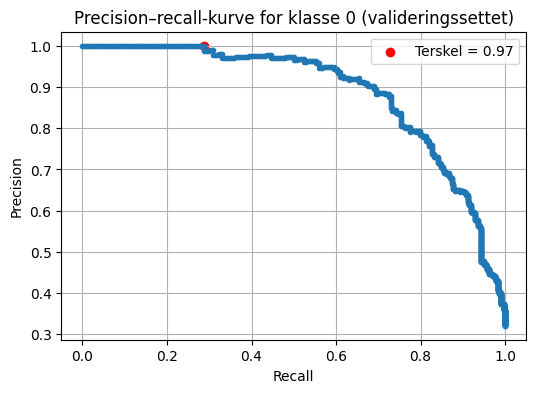

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–recall‑kurve for klasse 0 (valideringssettet)')

sel_idx = results_df.index[results_df['Threshold'] == optimal_threshold][0]
plt.scatter(results_df.loc[sel_idx, 'Recall'], results_df.loc[sel_idx, 'Precision'], color='red', label=f'Terskel = {optimal_threshold:.2f}')
plt.legend()
plt.grid(True)
plt.show()

Precision-Recall kurven og utskriften av metrikker for ulike thresholds viser at klasse 0 vil ha 1 i precision og 0.29 i recall ved threshold satt til 0.967 på valideringsdata.

In [ ]:
class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator, threshold=0.5, target_class=0):
        self.estimator = estimator
        self.threshold = threshold
        self.target_class = target_class

    def fit(self, X=None, y=None):
        self.classes_ = self.estimator.classes_
        self.target_index_ = np.where(self.classes_ == self.target_class)[0][0]
        return self

    def predict(self, X):
        proba = self.estimator.predict_proba(X)
        proba_adj = proba.copy()
        mask = proba_adj[:, self.target_index_] < self.threshold
        proba_adj[mask, self.target_index_] = -1.0
        pred_indices = np.argmax(proba_adj, axis=1)
        return self.classes_[pred_indices]

threshold_clf = ThresholdClassifier(estimator=hgb_model, threshold=optimal_threshold, target_class=0)
threshold_clf.fit()

test_predictions = threshold_clf.predict(test_features)

report = classification_report(test_targets, test_predictions, target_names=[str(cls) for cls in hgb_model.classes_], digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.986     0.254     0.403       284
           1      0.341     0.629     0.442       159
           2      0.782     0.919     0.845       442

    accuracy                          0.653       885
   macro avg      0.703     0.600     0.564       885
weighted avg      0.769     0.653     0.631       885



Her opprettet jeg en klasse som lar meg velge threshold slik at jeg kan optimalisere det for en spesifikk klasse.

## Kilder
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html